# Домашнее задание 2
## Yes/No Questions

deadline: 16 апреля 2020 2019, 09:00

В этом домашнем задании вы будете работать с корпусом BoolQ. Корпус состоит из вопросов, предполагающих бинарный ответ (да / нет), абзацев из Википедии,  содержащих ответ на вопрос, заголовка статьи, из которой извлечен абзац и непосредственно ответа (true / false).

Корпус описан в статье:

Christopher Clark, Kenton Lee, Ming-Wei Chang, Tom Kwiatkowski, Michael Collins, Kristina Toutanova
BoolQ: Exploring the Surprising Difficulty of Natural Yes/No Questions

https://arxiv.org/abs/1905.10044


Корпус (train-dev split) доступен в репозитории проекта:  https://github.com/google-research-datasets/boolean-questions

Используйте для обучения train часть корпуса, для валидации и тестирования – dev часть. 

Каждый бонус пункт оцениватся в 1 балл. 

### Пример вопроса: 
question: is batman and robin a sequel to batman forever

title: Batman & Robin (film)

answer: true

passage: With the box office success of Batman Forever in June 1995, Warner Bros. immediately commissioned a sequel. They hired director Joel Schumacher and writer Akiva Goldsman to reprise their duties the following August, and decided it was best to fast track production for a June 1997 target release date, which is a break from the usual 3-year gap between films. Schumacher wanted to homage both the broad camp style of the 1960s television series and the work of Dick Sprang. The storyline of Batman & Robin was conceived by Schumacher and Goldsman during pre-production on A Time to Kill. Portions of Mr. Freeze's back-story were based on the Batman: The Animated Series episode ''Heart of Ice'', written by Paul Dini.

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание сдается через anytask, инвайты будут дополнительно высланы.
3. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
4. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
5. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
6. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
7. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 

## Часть 1. [1 балл] Эксплоративный анализ
1. Посчитайте долю yes и no классов в корпусе
2. Оцените среднюю длину вопроса
3. Оцените среднюю длину параграфа
4. Предположите, по каким эвристикам были собраны вопросы (или найдите ответ в статье). Продемонстриуйте, как эти эвристики повлияли на структуру корпуса. 

## Часть 2. [1 балл] Baseline
1. Оцените accuracy точность совсем простого базового решения: присвоить каждой паре вопрос-ответ в dev части самый частый класс из train части
2. Оцените accuracy чуть более сложного базового решения: fasttext на текстах, состоящих из склееных вопросов и абзацев (' '.join([question, passage]))

Почему fasttext плохо справляется с этой задачей?

## Часть 3. [1 балл] Используем эмбеддинги предложений
1. Постройте BERT эмбеддинги вопроса и абзаца. Обучите логистическую регрессию на конкатенированных эмбеддингах вопроса и абзаца и оцените accuracy этого решения. 

[bonus] Используйте другие модели эмбеддингов, доступные, например, в библиотеке 🤗 Transformers. Какая модель эмбеддингов даст лучшие результаты?

[bonus] Предложите метод аугментации данных и продемонстрируйте его эффективность. 

## Часть 3. [3 балла] DrQA-подобная архитектура

Основана на статье: Reading Wikipedia to Answer Open-Domain Questions

Danqi Chen, Adam Fisch, Jason Weston, Antoine Bordes

https://arxiv.org/abs/1704.00051

Архитектура DrQA предложена для задачи SQuAD, но легко может быть адаптирована к текущему заданию. Модель состоит из следующих блоков:
1. Кодировщик абзаца [paragraph encoding] – LSTM, получаящая на вход вектора слов, состоящие из: 
* эмбеддинга слова (w2v или fasttext)
* дополнительных признаков-индикаторов, кодирующих в виде one-hot векторов часть речи слова, является ли оно именованной сущностью или нет, встречается ли слово в вопросе или нет 
* выровненного эмбеддинга вопроса, получаемого с использованием soft attention между эмбеддингами слов из абзаца и эмбеддингом вопроса.

$f_{align}(p_i) = \sum_j􏰂 a_{i,j} E(q_j)$, где $E(q_j)$ – эмбеддинг слова из вопроса. Формула для $a_{i,j}$ приведена в статье. 

2. Кодировщик вопроса [question encoding] – LSTM, получаящая на вход эмбеддинги слов из вопроса. Выход кодировщика: $q = 􏰂\sum_j􏰂  b_j q_j$. Формула для $b_{j}$ приведена в статье. 

3. Слой предсказания. 

Предложите, как можно было модифицировать последний слой предсказания в архитектуре DrQA, с учетом того, что итоговое предсказание – это метка yes / no, предсказание которой проще, чем предсказание спана ответа для SQuAD.

Оцените качество этой модели для решения задачи. 

[bonus] Замените входные эмбеддинги и все дополнительные признаки, используемые кодировщиками, на BERT эмбеддинги. Улучшит ли это качество результатов?

## Часть 4. [3 балла] BiDAF-подобная архитектура

Основана на статье: Bidirectional Attention Flow for Machine Comprehension

Minjoon Seo, Aniruddha Kembhavi, Ali Farhadi, Hannaneh Hajishirzi

https://arxiv.org/abs/1611.01603

Архитектура BiDAF предложена для задачи SQuAD, но легко может быть адаптирована к текущему заданию. Модель состоит из следующих блоков:
1. Кодировщик  получает на вход два представления слова: эмбеддинг слова и полученное из CNN посимвольное представление слова. Кодировщики для вопроса и для параграфа одинаковы. 
2. Слой внимания (детальное описание приведено в статье, см. пункт Attention Flow Layer)
3. Промежуточный слой, который получает на вход контекстуализированные эмбеддинги слов из параграфа, состоящие из трех частей (выход кодировщика параграфа,   Query2Context (один вектор) и Context2Query (матрица) выравнивания

4. Слой предсказания. 

Предложите, как можно было модифицировать последний слой предсказания в архитектуре BiDAF, с учетом того, что итоговое предсказание – это метка yes / no, предсказание которой проще, чем предсказание спана ответа для SQuAD.

Оцените качество этой модели для решения задачи. 

[bonus] Замените входные эмбеддинги и все дополнительные признаки, используемые кодировщиками, на BERT эмбеддинги. Улучшит ли это качество результатов?

Сравнение DrQA и BiDAF:
    
![](https://www.researchgate.net/profile/Felix_Wu6/publication/321069852/figure/fig1/AS:560800147881984@1510716582560/Schematic-layouts-of-the-BiDAF-left-and-DrQA-right-architectures-We-propose-to.png)

## Часть 5. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Сравните результаты всех разработанных моделей. Что помогло вам в выполнении работы, чего не хватало?

# Задание

## Скачиваем данные

In [1513]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from typing import Tuple, List, Union, Dict, Iterable
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

N_THREADS = 56

In [5]:
def read_jsonl(path: str) -> pd.DataFrame:
    df = pd.DataFrame(columns=['question', 'title', 'answer', 'passage'])
    
    with open(path, 'r') as f:
        for line in f:
            line_dict = json.loads(line.strip())
            df = df.append(line_dict, ignore_index=True)

    return df

In [6]:
# train_df = read_jsonl('train.jsonl')

In [7]:
# dev_df = read_jsonl('dev.jsonl')

In [9]:
# dev, test = train_test_split(dev_df, random_state=42, test_size=0.33, stratify=dev_df['answer'])

In [10]:
# train_df.to_csv('train.csv')
# dev.to_csv('dev_split.csv')
# test.to_csv('test.csv')

Сразу разделили dev на dev и test, чтобы сравнивать все модели на одинаковых данных.

In [1514]:
train_df = pd.read_csv('train.csv', index_col=0)
dev_df = pd.read_csv('dev_split.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [12]:
train_df.head()

,question,title,answer,passage
0,do iran and afghanistan speak the same language,Persian language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ..."
1,do good samaritan laws protect those who help ...,Good Samaritan law,True,Good Samaritan laws offer legal protection to ...
2,is windows movie maker part of windows essentials,Windows Movie Maker,True,Windows Movie Maker (formerly known as Windows...
3,is confectionary sugar the same as powdered sugar,Powdered sugar,True,"Powdered sugar, also called confectioners' sug..."
4,is elder scrolls online the same as skyrim,The Elder Scrolls Online,False,As with other games in The Elder Scrolls serie...


## Часть 1. [1 балл] Эксплоративный анализ

### Посчитайте долю yes и no классов в корпусе

In [13]:
def calc_true_false_rate(df: pd.DataFrame, heading: str) -> Tuple[float, float]:
    n = len(df)
    true_cnt = len(df[df['answer'] == True])
    false_cnt = n - true_cnt
    print(f'{heading}: true_rate = {true_cnt / n}, false_cnt = {false_cnt / n}')
    return true_cnt / n, false_cnt / n

In [14]:
true_rate, false_rate = calc_true_false_rate(train_df, heading='train_df')
_ = calc_true_false_rate(dev_df, heading='dev_df')
_ = calc_true_false_rate(test_df, heading='test_df')

train_df: true_rate = 0.6231038506417736, false_cnt = 0.37689614935822635
dev_df: true_rate = 0.6219178082191781, false_cnt = 0.3780821917808219
test_df: true_rate = 0.6212962962962963, false_cnt = 0.3787037037037037


**yes встречается примерно в 1.5 раза чаще, чем no**

### Оцените среднюю длину вопроса

In [15]:
def avg_column_len(column: Iterable[str], heading: str):
    avg_len_sym = np.mean([len(q) for q in column])
    avg_len_words = np.mean([len(q.split()) for q in column])
    print(
        f'{heading}: avg_len_words = {avg_len_words}, avg_len_symbols = {avg_len_sym}'
    )

In [16]:
avg_column_len(train_df['question'], heading='train_df')
avg_column_len(dev_df['question'], heading='dev_df')
avg_column_len(test_df['question'], heading='test_df')

train_df: avg_len_words = 8.815742017608995, avg_len_symbols = 43.99193805028111
dev_df: avg_len_words = 8.695890410958905, avg_len_symbols = 43.20319634703196
test_df: avg_len_words = 8.72962962962963, avg_len_symbols = 43.21296296296296


**средняя длина вопроса примерно 9 cлов, 44 символа**

### Оцените среднюю длину параграфа

In [17]:
avg_column_len(train_df['passage'], heading='train_df')
avg_column_len(dev_df['passage'], heading='dev_df')
avg_column_len(test_df['passage'], heading='test_df')

train_df: avg_len_words = 93.16580036066617, avg_len_symbols = 565.6130264134931
dev_df: avg_len_words = 91.61232876712329, avg_len_symbols = 555.4438356164384
test_df: avg_len_words = 93.30740740740741, avg_len_symbols = 566.3694444444444


**средняя длина параграфа примерно 93 cлова, 566 символов**

### Предположите, по каким эвристикам были собраны вопросы (или найдите ответ в статье). Продемонстриуйте, как эти эвристики повлияли на структуру корпуса. 

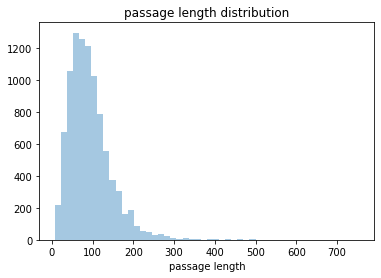

In [18]:
plt = sns.distplot([len(q.split()) for q in train_df['passage']], kde=False)
plt.set_title('passage length [words] distribution')
_ = plt.set_xlabel('passage length')

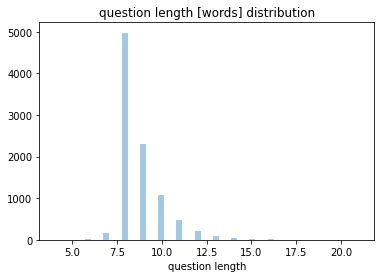

In [997]:
plt = sns.distplot([len(q.split()) for q in train_df['question']], kde=False)
plt.set_title('question length [words] distribution')
_ = plt.set_xlabel('question length')

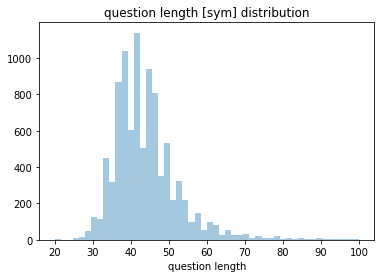

In [1210]:
plt = sns.distplot([len(q) for q in train_df['question']], kde=False)
plt.set_title('question length [sym] distribution')
_ = plt.set_xlabel('question length')

In [1214]:
MAX_LEN_QUEST_SYM = 90

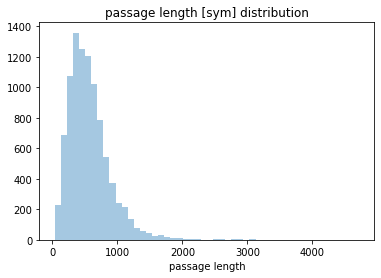

In [1211]:
plt = sns.distplot([len(q) for q in train_df['passage']], kde=False)
plt.set_title('passage length [sym] distribution')
_ = plt.set_xlabel('passage length')

In [1213]:
MAX_LEN_PASSAGE_SYM = 1000

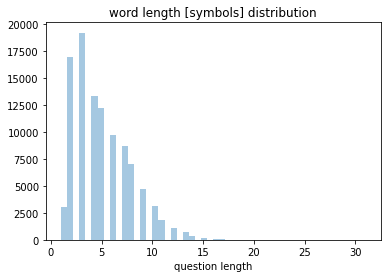

In [1313]:
question_words = sum(train_df['question'][:1000].apply(lambda q: q.split()).to_list(), [])
passage_words = sum(train_df['passage'][:1000].apply(lambda p: p.split()).to_list(), [])
words = (question_words + passage_words)[:1000]
plt = sns.distplot([len(word) for word in question_words + passage_words], kde=False)
plt.set_title('word length [symbols] distribution')
_ = plt.set_xlabel('question length')

In [1314]:
MAX_WORD_LEN_SYM = 15

В статье написано, что вопросы собирались из гугл запросов пользователей. Из всех запросов отбирались те, которые начинались со слов-индикаторов (did, do, does, is,.. etc), и были достаточного размера, также в первых пяти результатах поисковика была википедия. Затем разметчики отбирали "хорошие" вопросы (понятные, однозначные, про факты).


Вопросов с положительным ответом чуть больше, чем с отрицательным. Возможно, это связано с тем, что люди чаще запрашивают вопросы с положительным ответом (проверяют факты, в которых не уверены, и оказываются правы).


Обычно поисковые запросы не очень большие, что и видно из распределения. Все вопросы имеют примерно одинаковую длину. Причем длина не меньше 6, так как выбирались осмысленные запросы.

Параграф должен содержать ответ на вопрос, поэтому минимальная длина 7 слов -- похоже на предложение, длинные параграфы (больше 150 слов) встречаются редко, вероятно, потому что в публицистическом стиле не используют длинные параграфы.

## Часть 2. [1 балл] Baseline

### Оцените accuracy точность совсем простого базового решения: присвоить каждой паре вопрос-ответ в dev части самый частый класс из train части

In [21]:
! git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 3768 (delta 35), reused 46 (delta 15), pack-reused 3684
Receiving objects: 100% (3768/3768), 8.20 MiB | 11.14 MiB/s, done.
Resolving deltas: 100% (2354/2354), done.


In [22]:
! pip3 install fastText/.

Processing ./fastText
  Created wheel for fasttext: filename=fasttext-0.9.1-cp37-cp37m-linux_x86_64.whl size=2876657 sha256=ab12890b5620189346e2b5ce990a46410be62a8cb01c39b0fe148fdbf73d924b
  Stored in directory: /place/vartmp/pip-ephem-wheel-cache-dvvtyhmw/wheels/e8/f4/68/b91846f92bea77b9d713f3a4d6d00d2d5494f6fdd52af412d2
Successfully built fasttext
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1515]:
import fasttext
from sklearn.metrics import accuracy_score
from nltk.tokenize import WordPunctTokenizer
import csv
from tqdm.notebook import tqdm as tqdm

In [26]:
def evaluate_simple_model(df):
    y_true = df['answer'].to_list()
    y_pred = np.repeat(True, len(y_true))
    acc = accuracy_score(y_true=y_true, y_pred=y_pred)
    print(f'basline (always true) accuracy = {acc}')

In [102]:
evaluate_simple_model(dev_df)

basline (always true) accuracy = 0.6219178082191781


### Оцените accuracy чуть более сложного базового решения: fasttext на текстах, состоящих из склееных вопросов и абзацев (' '.join([question, passage]))

Почему fasttext плохо справляется с этой задачей?

In [27]:
def word_punkt_tokenize_and_lowercase(sentence: str) -> str:
    if sentence.startswith('"'):
        sentence = sentence[1:]
    if sentence.endswith('"'):
        sentence = sentence[:-1]
    words = WordPunctTokenizer().tokenize(sentence)
    words = list(map(lambda x: x.lower(), words))
    return ' '.join(words)

In [28]:
def prepare_df(df: pd.DataFrame) -> pd.DataFrame:
    prepared = df.copy()
    prepared.passage = prepared.passage.apply(word_punkt_tokenize_and_lowercase)
    prepared.question = prepared.question.apply(word_punkt_tokenize_and_lowercase)
    prepared.title = prepared.title.apply(word_punkt_tokenize_and_lowercase)
    return prepared

In [29]:
train_df_prepared = prepare_df(train_df)
dev_df_prepared = prepare_df(dev_df)
test_df_prepared = prepare_df(test_df)

In [30]:
train_df_prepared.to_csv('train_prepared.csv')
dev_df_prepared.to_csv('dev_prepared.csv')
test_df_prepared.to_csv('test_prepared.csv')

In [222]:
train_df = pd.read_csv('train_prepared.csv', index_col=0)
dev_df = pd.read_csv('dev_prepared.csv', index_col=0)
test_df = pd.read_csv('dev_prepared.csv', index_col=0)

In [32]:
def get_text_for_fastttext(df: pd.DataFrame, i: int, need_label=False) -> str:
    text = ''
    if need_label:
        text = df.iloc[i]['label'] + ' '
    text += ' '.join([df.iloc[i]['question'], df.iloc[i]['passage']])
    return text

In [33]:
def answer_to_label(answer: bool) -> str:
    return '__label__' + str(answer)

def label_to_answer(label: str) -> bool:
    if 'True' in label:
        return True
    elif 'False' in label:
        return False
    else:
        assert False

In [34]:
def save_df_for_fasttext(df: pd.DataFrame, path: str):
    df = df.copy()
    df['label'] = df.answer.apply(answer_to_label)
    with open(path, 'w') as out_f:
        for i in range(len(df)):
            line = get_text_for_fastttext(df, i, need_label=True)
            print(line, file=out_f)

In [35]:
save_df_for_fasttext(train_df, 'train_for_fasttext.txt')

In [36]:
baseline_ft = fasttext.train_supervised(
    'train_for_fasttext.txt',
    epoch=1000,
    dim=256,
    thread=N_THREADS)

In [37]:
def evaluate_ft_model(model, df, do_print=False):
    df = df.copy()
    texts = []
    for i in range(len(df)):
        texts.append(get_text_for_fastttext(df, i))
    y_true = df.answer.to_list()
    y_pred = model.predict(texts)[0]
    y_pred = np.array(y_pred).flatten()
    y_pred = list(map(label_to_answer, y_pred))
    acc = accuracy_score(y_true=y_true, y_pred=y_pred)
    if do_print:
        print(f'baseline fasttext accuracy = {acc}')
    return acc

In [286]:
def train_evaluate_and_plot(train: pd.DataFrame, validate: pd.DataFrame, lr, epoch_list: List):
    assert 0.1 <= lr <= 1.0
    
    train_accs = []
    val_accs = []
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    for epoch in tqdm(epoch_list):
        ft_model = fasttext.train_supervised(
            'train_for_fasttext.txt',
            epoch=epoch,
            dim=256,
            lr=lr,
            thread=N_THREADS
        )
        train_acc = evaluate_ft_model(ft_model, df=train)
        val_acc = evaluate_ft_model(ft_model, df=validate)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
    i = np.argmax(val_accs)
    plt.plot(epoch_list, train_accs)
    plt.plot(epoch_list, val_accs)
    plt.legend(['train', 'val'])
    plt.title(f'lr={lr}')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.show()
    return epoch_list[i], val_accs[i]

In [295]:
def choose_best_params():
    best_params = None
    best_acc = 0
    for lr in np.linspace(0.1, 1.0, 10):
        epoch, acc = train_evaluate_and_plot(train_df, dev_df, lr=lr, epoch_list=[10, 20, 30, 50, 100])
        if acc > best_acc:
            best_params = (lr, epoch)
            best_acc = acc
            
    return best_params + (best_acc,)

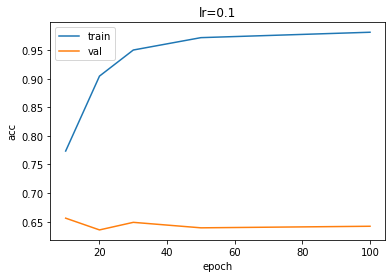

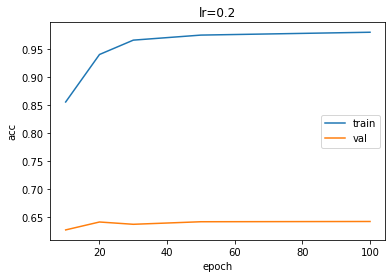

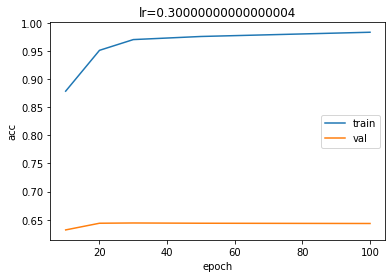

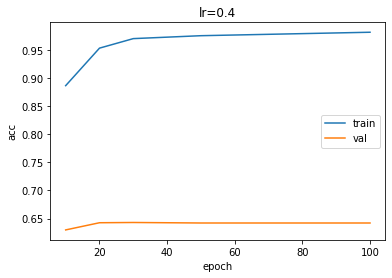

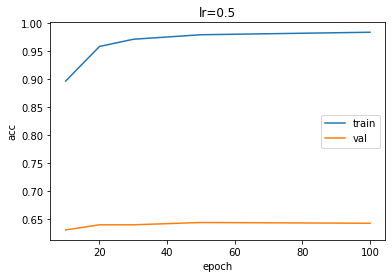

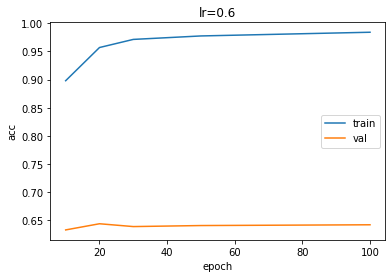

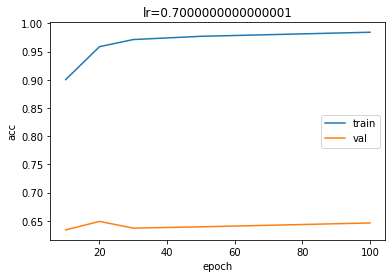

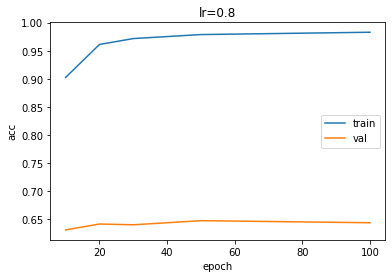

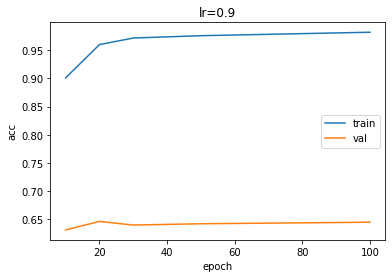

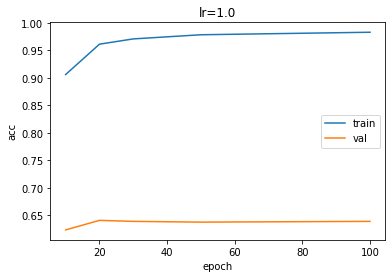

In [296]:
ft_best_params = choose_best_params()

In [297]:
ft_best_params

(0.1, 10, 0.6561643835616439)

Fasttext лучше простого бейзлайна только на 3%.

Модель не использует то, что вопрос и параграф существенно отличаются по смыслу. Эмбеддинг, который подается в логистическую регрессию, -- усреднение эмбедингов слов, длина вопроса значительно меньше длины параграфа, поэтому вклад вопроса в этом эмбеддинге небольшой.

## Часть 3. [1 балл] Используем эмбеддинги предложений

### BERT эмбеддинги вопроса и абзаца

In [1516]:
import logging
from keras.preprocessing.sequence import pad_sequences
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import pickle
import re

In [51]:
train_df.head()

,question,title,answer,passage
0,do iran and afghanistan speak the same language,persian language,True,"persian (/ ˈpɜːrʒən , - ʃən /), also known by ..."
1,do good samaritan laws protect those who help ...,good samaritan law,True,good samaritan laws offer legal protection to ...
2,is windows movie maker part of windows essentials,windows movie maker,True,windows movie maker ( formerly known as window...
3,is confectionary sugar the same as powdered sugar,powdered sugar,True,"powdered sugar , also called confectioners ' s..."
4,is elder scrolls online the same as skyrim,the elder scrolls online,False,as with other games in the elder scrolls serie...


In [1517]:
SEPARATOR = '[SEP]'
CLS = '[CLS] '
SENTENCE_END = ['.', '?', '!']
OUTPUT_LAYER = 12
MAX_LEN_PASSAGE = 350
MAX_LEN_QUEST = 20

In [1518]:
def mark_text(row):
    return CLS + row + SEPARATOR

In [1519]:
def mark_df(df: pd.DataFrame):
    df['proc_passage'] = df['passage'].apply(mark_text)
    df['proc_question'] = df['question'].apply(mark_text)
    
    return df

In [8]:
train_df = mark_df(train_df)
dev_df = mark_df(dev_df)
test_df = mark_df(test_df)

In [1520]:
def get_bert_embeds(marked_texts, max_len):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    tokenized_texts = [tokenizer.tokenize(text) for text in marked_texts]

    input_ids = [tokenizer.convert_tokens_to_ids(text) for text in tokenized_texts]
    input_ids = pad_sequences(input_ids,
                              maxlen=max_len,
                              dtype="long",
                              truncating="post",
                              padding="post")

    attention_masks = []
    for seq in input_ids:
        seq_mask = [int(i > 0) for i in seq]
        attention_masks.append(seq_mask)

    segments_ids = [[1] * max_len for text in tokenized_texts]

    tokens_tensor = torch.tensor(input_ids)
    segments_tensor = torch.tensor(segments_ids)
    attention_tensor = torch.tensor(attention_masks)

    model = BertModel.from_pretrained('bert-base-uncased',
                                      output_hidden_states=True)
    model = model.eval()

    with torch.no_grad():
        _, _, encoded_layers = model(input_ids=tokens_tensor,
                                     attention_mask=attention_tensor,
                                     token_type_ids=segments_tensor)

    embeds = []
    for embed in encoded_layers[OUTPUT_LAYER]:
        embeds.append(torch.mean(embed, dim=0))

    return embeds

In [1521]:
def bert_df(df, column, file_name, max_len):
    BATCH_SIZE = 256

    passages = df[column].to_list()
    bert_passage = []
    for idx in tqdm(range(0, len(passages), BATCH_SIZE)):
        bert_passage.extend(
            get_bert_embeds(passages[idx:min(len(passages), idx + BATCH_SIZE)], max_len)
        )

    print(f'Calculated embeds for {column}...')
    
    with open(f'bert_{column}_{file_name}.pickle', 'wb') as f:
        pickle.dump(bert_passage, f)
        
    print(f'Saved embeds for {column}...')
        
    del bert_passage

In [77]:
%%time
bert_df(df=train_df, column='proc_passage', file_name='train', max_len=MAX_LEN_PASSAGE)
bert_df(df=train_df, column='proc_question', file_name='train', max_len=MAX_LEN_QUEST)


Calculated embeds for proc_passage...
Saved embeds for proc_passage...



Calculated embeds for proc_question...
Saved embeds for proc_question...
CPU times: user 5h 19min 37s, sys: 38min 52s, total: 5h 58min 30s
Wall time: 1h 44min 1s


In [78]:
%%time
bert_df(df=dev_df, column='proc_passage', file_name='dev', max_len=MAX_LEN_PASSAGE)
bert_df(df=dev_df, column='proc_question', file_name='dev', max_len=MAX_LEN_QUEST)


Calculated embeds for proc_passage...
Saved embeds for proc_passage...



Calculated embeds for proc_question...
Saved embeds for proc_question...
CPU times: user 1h 20min 25s, sys: 5min 57s, total: 1h 26min 22s
Wall time: 28min 35s


In [79]:
%%time
bert_df(df=test_df, column='proc_passage', file_name='test', max_len=MAX_LEN_PASSAGE)
bert_df(df=test_df, column='proc_question', file_name='test', max_len=MAX_LEN_QUEST)


Calculated embeds for proc_passage...
Saved embeds for proc_passage...



Calculated embeds for proc_question...
Saved embeds for proc_question...
CPU times: user 39min 50s, sys: 2min 47s, total: 42min 37s
Wall time: 12min 55s


In [1522]:
def load_embeddings(column, file_name):
    with open(f'bert_{column}_{file_name}.pickle', 'rb') as f:
        embeds = pickle.load(f)
    return embeds

In [1523]:
def concat_question_passage(questions, passages):
    unite = []
    for q, p in zip(questions, passages):
        unite.append(torch.cat((q, p), dim=0).numpy().flatten())
    return unite

In [1524]:
def concat_embeddings(file_name):
    passage = load_embeddings('proc_passage', file_name)
    question = load_embeddings('proc_question', file_name)
    return concat_question_passage(question, passage)

In [57]:
train_embeds = concat_embeddings('train')
dev_embeds = concat_embeddings('dev')
test_embeds = concat_embeddings('test')

### Обучите логистическую регрессию на конкатенированных эмбеддингах вопроса и абзаца и оцените accuracy этого решения

In [1525]:
from sklearn.linear_model import LogisticRegressionCV

In [61]:
clf = LogisticRegressionCV(cv=5,
                           random_state=42,
                           max_iter=1000,
                           n_jobs=N_THREADS).fit(train_embeds, train_df.answer.to_list())

In [86]:
y_pred = clf.predict(dev_embeds)
accuracy_score(y_true=dev_df.answer.to_list(), y_pred=y_pred)

0.6607305936073059

Результат незначительно лучше, чем у fasttext. Можно предположить, что проблема в том, что эмбеддинги вопроса и текста никак между собой не связаны.

## Часть 3. [3 балла] DrQA-подобная архитектура

Основана на статье: Reading Wikipedia to Answer Open-Domain Questions

Danqi Chen, Adam Fisch, Jason Weston, Antoine Bordes

https://arxiv.org/abs/1704.00051

Архитектура DrQA предложена для задачи SQuAD, но легко может быть адаптирована к текущему заданию. Модель состоит из следующих блоков:
1. Кодировщик абзаца [paragraph encoding] – LSTM, получаящая на вход вектора слов, состоящие из: 
* эмбеддинга слова (w2v или fasttext)
* дополнительных признаков-индикаторов, кодирующих в виде one-hot векторов часть речи слова, является ли оно именованной сущностью или нет, встречается ли слово в вопросе или нет 
* выровненного эмбеддинга вопроса, получаемого с использованием soft attention между эмбеддингами слов из абзаца и эмбеддингом вопроса.

$f_{align}(p_i) = \sum_j􏰂 a_{i,j} E(q_j)$, где $E(q_j)$ – эмбеддинг слова из вопроса. Формула для $a_{i,j}$ приведена в статье. 

2. Кодировщик вопроса [question encoding] – LSTM, получаящая на вход эмбеддинги слов из вопроса. Выход кодировщика: $q = 􏰂\sum_j􏰂  b_j q_j$. Формула для $b_{j}$ приведена в статье. 

3. Слой предсказания. 

Предложите, как можно было модифицировать последний слой предсказания в архитектуре DrQA, с учетом того, что итоговое предсказание – это метка yes / no, предсказание которой проще, чем предсказание спана ответа для SQuAD.

Оцените качество этой модели для решения задачи. 

[bonus] Замените входные эмбеддинги и все дополнительные признаки, используемые кодировщиками, на BERT эмбеддинги. Улучшит ли это качество результатов?

Сравнение DrQA и BiDAF:
    
![](https://www.researchgate.net/profile/Felix_Wu6/publication/321069852/figure/fig1/AS:560800147881984@1510716582560/Schematic-layouts-of-the-BiDAF-left-and-DrQA-right-architectures-We-propose-to.png)

In [1526]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.utils.class_weight import compute_sample_weight
from collections import defaultdict
import multiprocessing
import nltk
from sklearn.preprocessing import OneHotEncoder

In [204]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/ulyanin/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

### Получение эмбеддингов и фичей для параграфов и вопросов

#### Эмбеддинги слов в параграфах и вопросах

Берем готовую модель fasttext, делаем паддинг, получаем эмбеддинги

In [223]:
import fasttext.util
en_ft_name = fasttext.util.download_model('en', if_exists='ignore')  # English
print(en_ft_name)

cc.en.300.bin


In [355]:
FT_EMBEDS_DIM = 300

In [224]:
ft_model = fasttext.load_model(en_ft_name)

In [235]:
def padding(texts, max_size):
    padded = []
    for text in tqdm(texts):
        text = text.split()
        if len(text) >= max_size:
            padded.append(text[:max_size])
        else:
            text += ['']*(max_size - len(text))
            padded.append(text)
    return padded

In [1047]:
train_passages = padding(train_df.passage, MAX_LEN_PASSAGE)
train_questions = padding(train_df.question, MAX_LEN_QUEST)

In [451]:
dev_passages = padding(dev_df.passage, MAX_LEN_PASSAGE)
dev_questions = padding(dev_df.question, MAX_LEN_QUEST)

test_passages = padding(test_df.passage, MAX_LEN_PASSAGE)
test_questions = padding(test_df.question, MAX_LEN_QUEST)

In [237]:
def get_sentence_embeddings(sentence: List[str], model=ft_model):
    word_embeds = []
    for word in sentence:
        word_embeds.append(model[word])
    return word_embeds

In [238]:
def get_embeddings(sentences: List[List[str]], model=ft_model):
    embeds = []
    size = None
    for sentence in tqdm(sentences):
        assert not size or size == len(sentence)
        embeds.append(get_sentence_embeddings(sentence,model=model))
        size = len(embeds[-1])
    return np.array(embeds)    

#### match_features: встречается ли слово в вопросе или нет

In [347]:
def get_match_features(df):
    match_features = []
    for i in tqdm(range(len(df))):
        p = df.iloc[i].passage.split()
        q = df.iloc[i].question.split()
        ft = []
        for i in range(MAX_LEN_PASSAGE):
            if i < len(p):
                ft.append([int(p[i] in q)])
            else:
                ft.append([0])
        match_features.append(np.array(ft))
    return np.array(match_features)

#### POS_features: one-hot векторов часть речи слова

In [902]:
# оставляем среди частей речи только самые частые и train (иначе получалось 45 фичей и плохо обучалась DRQA)
most_common = [
 ('NN', 24470),
 ('IN', 12576),
 ('DT', 10783),
 ('JJ', 9921),
 ('NNS', 6422),
# (',', 5842),
# ('.', 4369),
 ('CD', 4187),
 ('CC', 3669),
 ('VBN', 3339),
 ('RB', 3059),
 ('VBZ', 2987),
 ('VBD', 2173),
 ('VB', 2113),
 ('TO', 1903),
 ('', 0),
]
POS_TAGS_LIST = [tag for tag, _ in most_common]
len(POS_TAGS_LIST), POS_TAGS_LIST

(14,
 ['NN',
  'IN',
  'DT',
  'JJ',
  'NNS',
  'CD',
  'CC',
  'VBN',
  'RB',
  'VBZ',
  'VBD',
  'VB',
  'TO',
  ''])

In [903]:
def filter_pos_tags(pos_tags: List[Tuple[str, str]]) -> Iterable[str]:
    for word, tag in pos_tags:
        if tag in POS_TAGS_LIST:
            yield tag
        else:
            yield 'OTHER'
    

In [904]:
def my_pos_tag(sentence):
    real_len = -1 if '' not in sentence else sentence.index('')
    if real_len == -1:
        return nltk.pos_tag(sentence)
    tags = nltk.pos_tag(sentence[:real_len])
    rest = [('','')] * (len(sentence) - real_len)
    return tags + rest

In [905]:
def get_pos_tags(sentences):
    sentence_pos_tags = []
    pos_tags_set = set()
    for sentence in tqdm(sentences):
        L = []
        tags = my_pos_tag(sentence)
        assert len(tags) == len(sentence)
        assert sentence == [word for word, tag in tags]
        sentence_pos_tags.append(
            list(filter_pos_tags(tags))
        )
        #print(sentence_pos_tags[-1])
        pos_tags_set |= set(sentence_pos_tags[-1])
    return np.array(sentence_pos_tags), pos_tags_set

In [906]:
train_passage_poses, ALL_POS_TAGS = get_pos_tags(train_passages)

In [909]:
dev_passage_poses, _ = get_pos_tags(dev_passages)
test_passage_poses, _ = get_pos_tags(test_passages)

In [910]:
print(train_passage_poses.shape,
    dev_passage_poses.shape,
    test_passage_poses.shape)

(9427, 350) (2190, 350) (1080, 350)


In [911]:
pos_tag_encoder = OneHotEncoder()
pos_tag_encoder.fit(train_passage_poses.reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [912]:
len(pos_tag_encoder.categories_[0]), pos_tag_encoder.categories_

(15,
 [array(['', 'CC', 'CD', 'DT', 'IN', 'JJ', 'NN', 'NNS', 'OTHER', 'RB', 'TO',
         'VB', 'VBD', 'VBN', 'VBZ'], dtype='<U5')])

In [913]:
POS_TAGS_DIM = len(pos_tag_encoder.categories_[0])

In [914]:
def get_pos_tags_features(sentences):
    size, words = sentences.shape
    res = pos_tag_encoder.transform(sentences.reshape(-1, 1)).toarray()
    return np.reshape(res, (size, words, -1))
    

In [917]:
train_pos_tags_passage_features = get_pos_tags_features(train_passage_poses)
train_pos_tags_passage_features.shape

(9427, 350, 15)

In [918]:
dev_pos_tags_passage_features = get_pos_tags_features(dev_passage_poses)
print(dev_pos_tags_passage_features.shape)

test_pos_tags_passage_features = get_pos_tags_features(test_passage_poses)
test_pos_tags_passage_features.shape

(2190, 350, 15)


(1080, 350, 15)

#### NER features: является ли слово именованной сущностью

In [1527]:
import nltk

from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import conlltags2tree, tree2conlltags


In [352]:
NER_FEATURES_DIM = 1

StanfordNERTagger и spacy использовать сходу не получилось, так как они по-своему токенизирует и позиция слова в предложении теряется

In [324]:
# from nltk.tag.stanford import StanfordNERTagger
# jar = './stanford-ner-2018-10-16/stanford-ner-3.9.2.jar'
# model = './stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz'

# Prepare NER tagger with english model
# ner_tagger = StanfordNERTagger(model, jar, encoding='utf8')

In [314]:
def get_NER_features(sentence):
    # '' is bad for nltk, so replace it with some neutral string like '.'
    sentence = [word if word else '.' for word in sentence]
    tagged = tree2conlltags(ne_chunk(pos_tag(sentence)))
    return [[ner_tag != 'O'] for word, _, ner_tag in tagged]

In [315]:
def get_NER_features_unparallel(sentences):
    return list(tqdm(map(get_NER_features, sentences), total=len(sentences)))

In [316]:
def get_NER_features_parallel(sentences, pool):
    return list(tqdm(pool.imap(get_NER_features, sentences), total=len(sentences)))

In [317]:
# get_NER_features_unparallel(train_passages[:1])

In [318]:
with multiprocessing.Pool(N_THREADS) as pool:
    train_ner_features = get_NER_features_parallel(train_passages, pool)
    train_ner_features = np.array(train_ner_features)

In [457]:
with multiprocessing.Pool(N_THREADS) as pool:
    dev_ner_features = get_NER_features_parallel(dev_passages, pool)
    dev_ner_features = np.array(dev_ner_features)
    
    test_ner_features = get_NER_features_parallel(test_passages, pool)
    test_ner_features = np.array(test_ner_features)

In [458]:
print(train_ner_features.shape)
print(dev_ner_features.shape)
print(test_ner_features.shape)

(9427, 350, 1)
(2190, 350, 1)
(1080, 350, 1)


**Получаемy one-hot encoding для y**

In [445]:
# def get_y(df):
#     answer = df.answer.values
    
#     indices = answer == True
#     y = np.zeros(shape=(len(answer), 2))
#     y[indices, 0] = 1
#     y[~indices, 1] = 1
#     return y

In [845]:
def get_y(df):
    answer = df.answer.values
    
    indices = answer == True
    y = np.zeros(shape=(len(answer), 1))
    y[indices, 0] = 1
    return y

In [846]:
y_train = get_y(train_df)
y_dev = get_y(dev_df)
y_test = get_y(test_df)

**Всё вместе**

In [919]:
TOKEN_FEATURES_DIM = POS_TAGS_DIM + NER_FEATURES_DIM

In [920]:
def get_embeddings_df(df, passages, questions, pos_tags, ner_features):
    passage_embeddings = get_embeddings(passages, model=ft_model)
    print(f'passage_embeddings = {passage_embeddings.shape}')
    
    question_embeddings = get_embeddings(questions, model=ft_model)
    print(f'question_embeddings = {question_embeddings.shape}')
    
    match_features = get_match_features(df)
    print(f'match_features = {match_features.shape}')
    
    token_features = np.concatenate([pos_tags, ner_features], axis=2)
    print(f'token_features = {token_features.shape}')
    return passage_embeddings, question_embeddings, match_features, token_features

In [922]:
train_embeds = get_embeddings_df(train_df, train_passages, train_questions, train_pos_tags_passage_features,train_ner_features)


passage_embeddings = (9427, 350, 300)



question_embeddings = (9427, 20, 300)



match_features = (9427, 350, 1)
token_features = (9427, 350, 16)


In [923]:
dev_embeds = get_embeddings_df(dev_df, dev_passages, dev_questions, dev_pos_tags_passage_features, dev_ner_features)
test_embeds = get_embeddings_df(test_df, test_passages, test_questions, test_pos_tags_passage_features, test_ner_features)


passage_embeddings = (2190, 350, 300)



question_embeddings = (2190, 20, 300)



match_features = (2190, 350, 1)
token_features = (2190, 350, 16)



passage_embeddings = (1080, 350, 300)



question_embeddings = (1080, 20, 300)



match_features = (1080, 350, 1)
token_features = (1080, 350, 16)


In [924]:
passage_embeddings, question_embeddings, match_features, token_features = train_embeds

In [925]:
assert passage_embeddings.shape[-1] == FT_EMBEDS_DIM
assert question_embeddings.shape[-1] == FT_EMBEDS_DIM
assert match_features.shape[-1] == 1
assert token_features.shape[-1] == TOKEN_FEATURES_DIM

### Имплементация DRQA на keras

In [1528]:
np.random.seed(42)
tf.random.set_seed(42)

In [813]:
class Layer(object):
    _name_dict = defaultdict(int)

    def __init__(self, name=None):
        if name is None:
            name = "layer"

        self.name = name + "_" + str(self._name_dict[name] + 1)
        self._name_dict[name] += 1

In [814]:
class QuestionEncoding(Layer):
    def __init__(self, 
                 quest_lstm=4,
                 dropout=0.3,
                 recurrent_dropout=0
                ):
        super(QuestionEncoding, self).__init__()
        #self.question_lstm = tf.keras.layers.Bidirectional(
        #    tf.keras.layers.LSTM(quest_lstm, return_sequences=True))
        self.question_lstms = []
        for i in range(3):
            self.question_lstms.append(
                tf.keras.layers.Bidirectional(
                   tf.keras.layers.LSTM(
                       quest_lstm, 
                       return_sequences=True, 
                       dropout=dropout,
                       recurrent_dropout=recurrent_dropout,
                       name=f'question_BiLSTM_{i}'))
            )
        self.question_dense = tf.keras.layers.Dense(1, use_bias=False)

    def __call__(self, inputs):
#         lstm_h = self.question_lstm(inputs)
        lstm_h = inputs
        for i in range(len(self.question_lstms)):
            lstm_h = self.question_lstms[i](lstm_h)
        # attention
        b = tf.nn.softmax(self.question_dense(lstm_h))
        q = tf.multiply(b, lstm_h)
        q = tf.reduce_sum(q, axis=1)
        return q

In [926]:
class ParagraphEncodingLayer(Layer):
    def __init__(self,
                 alpha_dim,
                 passage_lstm,
                 dropout=0.3,
                 recurrent_dropout=0
                ):
        super(ParagraphEncodingLayer, self).__init__()
        self.alpha = tf.keras.layers.Dense(alpha_dim,
                                           activation='relu',
                                           use_bias=False)
        self.passage_lstms = []
        for i in range(3):
            self.passage_lstms.append(
                tf.keras.layers.Bidirectional(
                    tf.keras.layers.LSTM(
                        passage_lstm, return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout)))
        
#         self.passage_lstm = tf.keras.layers.Bidirectional(
#             tf.keras.layers.LSTM(passage_lstm, return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout))
        

    def __call__(self, passage_embeds, question_embeds, match_features, token_features):
        passage_alpha = self.alpha(passage_embeds)
        question_alpha = self.alpha(question_embeds)

        # (batch, 350, 2) , (batch, 30, 2) --> (batch, 350, 30)
        product = tf.matmul(passage_alpha, question_alpha, transpose_b=True)
        a = tf.nn.softmax(product, axis=2)
        
        f_align = tf.matmul(a, question_embeds)
        
#         features = tf.concat([passage_embeds,  match_features, f_align], axis=2)
        features = tf.concat([passage_embeds,  match_features, token_features, f_align], axis=2)

#         lstm = self.passage_lstm(features)
        lstm = features
        for i in range(len(self.passage_lstms)):
            lstm = self.passage_lstms[i](lstm)
        return lstm

In [927]:
class BiLinear2(Layer):
    def __init__(self, name="bi_linear", hidden_units=1):
        super(BiLinear2, self).__init__(name)
        self.hidden_units = hidden_units
        self.projecting_layer = tf.keras.layers.Dense(self.hidden_units,
                                                          activation=None,
                                                          use_bias=False)

    def __call__(self, t0, t1):
        # (?, 350, 22)
        t0 = self.projecting_layer(t0)
        # (?, 350, hidden_units)
        # t0 = tf.expand_dims(t0, axis=2)
        # (?, 350, 1, hidden_units)
        
#         (?, 8)
        t1 = tf.expand_dims(t1, axis=2)
        res = tf.squeeze(tf.matmul(t0, t1), axis=2)

        return res

In [928]:
class PredictionLayer(Layer):
    def __init__(self, question_hidden_size):
        super(PredictionLayer, self).__init__()
        self.question_hidden_size = question_hidden_size
        self.bilinear = BiLinear2(hidden_units=self.question_hidden_size)
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True)
    
    def __call__(self, passage_embeddings, question_embeddings):
        p = self.bilinear(passage_embeddings, question_embeddings)

        # p.shape = (?, 350)
        p_yes_no = self.dense(p)

        return p_yes_no

In [929]:
def drqa(*,
         passage_size,
         question_size,
         embeds_dim,
         match_dim,
         token_features_dim,
         alpha_dim,
         passage_lstm,
         question_lstm,
         paragraph_params=dict(), 
         question_params=dict()):
    question_input = tf.keras.Input(shape=(question_size, embeds_dim),
                                    name='question')
    passage_input = tf.keras.Input(shape=(passage_size, embeds_dim),
                                   name='passage')
    match_input = tf.keras.Input(shape=(passage_size, match_dim),
                                 name='exact_match')
    token_features_input = tf.keras.Input(
        shape=(passage_size, token_features_dim),
        name='token_features'
    )

    passage_encoder = ParagraphEncodingLayer(alpha_dim=alpha_dim, passage_lstm=passage_lstm, **paragraph_params)
    passage_features = passage_encoder(passage_input, question_input,
                                       match_input, token_features_input)

    question_encoder = QuestionEncoding(quest_lstm=question_lstm, **question_params)
    question_features = question_encoder(question_input)

    question_hidden_size = 2 * question_lstm
    prediction_layer = PredictionLayer(question_hidden_size=question_hidden_size)
    prediction = prediction_layer(passage_features, question_features)

    # Instantiate an end-to-end model predicting both priority and department
    model = tf.keras.Model(
        inputs=[
            question_input, passage_input, match_input, token_features_input
        ],
        outputs=[prediction]
    )
    return model

In [930]:
ALPHA_DIM = 1
LSTM_PASSAGE_DIM = 16
LSTM_QUESTION_DIM = 16

BATCH_SIZES = [512]
EPOCHS = 10

In [835]:
# question = np.random.random([3, 30, 256])
# passage = np.random.random([3, 350, 256])
# match_ft = np.random.random([3, 350, 3])
# token_ft = np.random.random([3, 350, 2])

_model = drqa(
    passage_size=MAX_LEN_PASSAGE, 
    question_size=MAX_LEN_QUEST, 
    embeds_dim=FT_EMBEDS_DIM, 
    match_dim=1,
    token_features_dim=TOKEN_FEATURES_DIM,
    alpha_dim=ALPHA_DIM,
    passage_lstm=LSTM_PASSAGE_DIM,
    question_lstm=LSTM_QUESTION_DIM)

In [836]:
_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [837]:
train_df.shape[0]*(300*100 + 300*10 + 40*100 + 1*100 + 100)

350684400

In [838]:
_model.summary()

Model: "model_49"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
passage (InputLayer)            [(None, 350, 300)]   0                                            
__________________________________________________________________________________________________
question (InputLayer)           [(None, 20, 300)]    0                                            
__________________________________________________________________________________________________
dense_212 (Dense)               multiple             300         passage[0][0]                    
                                                                 question[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_MatMul_158 (TensorF [(None, 350, 20)]    0           dense_212[0][0]           

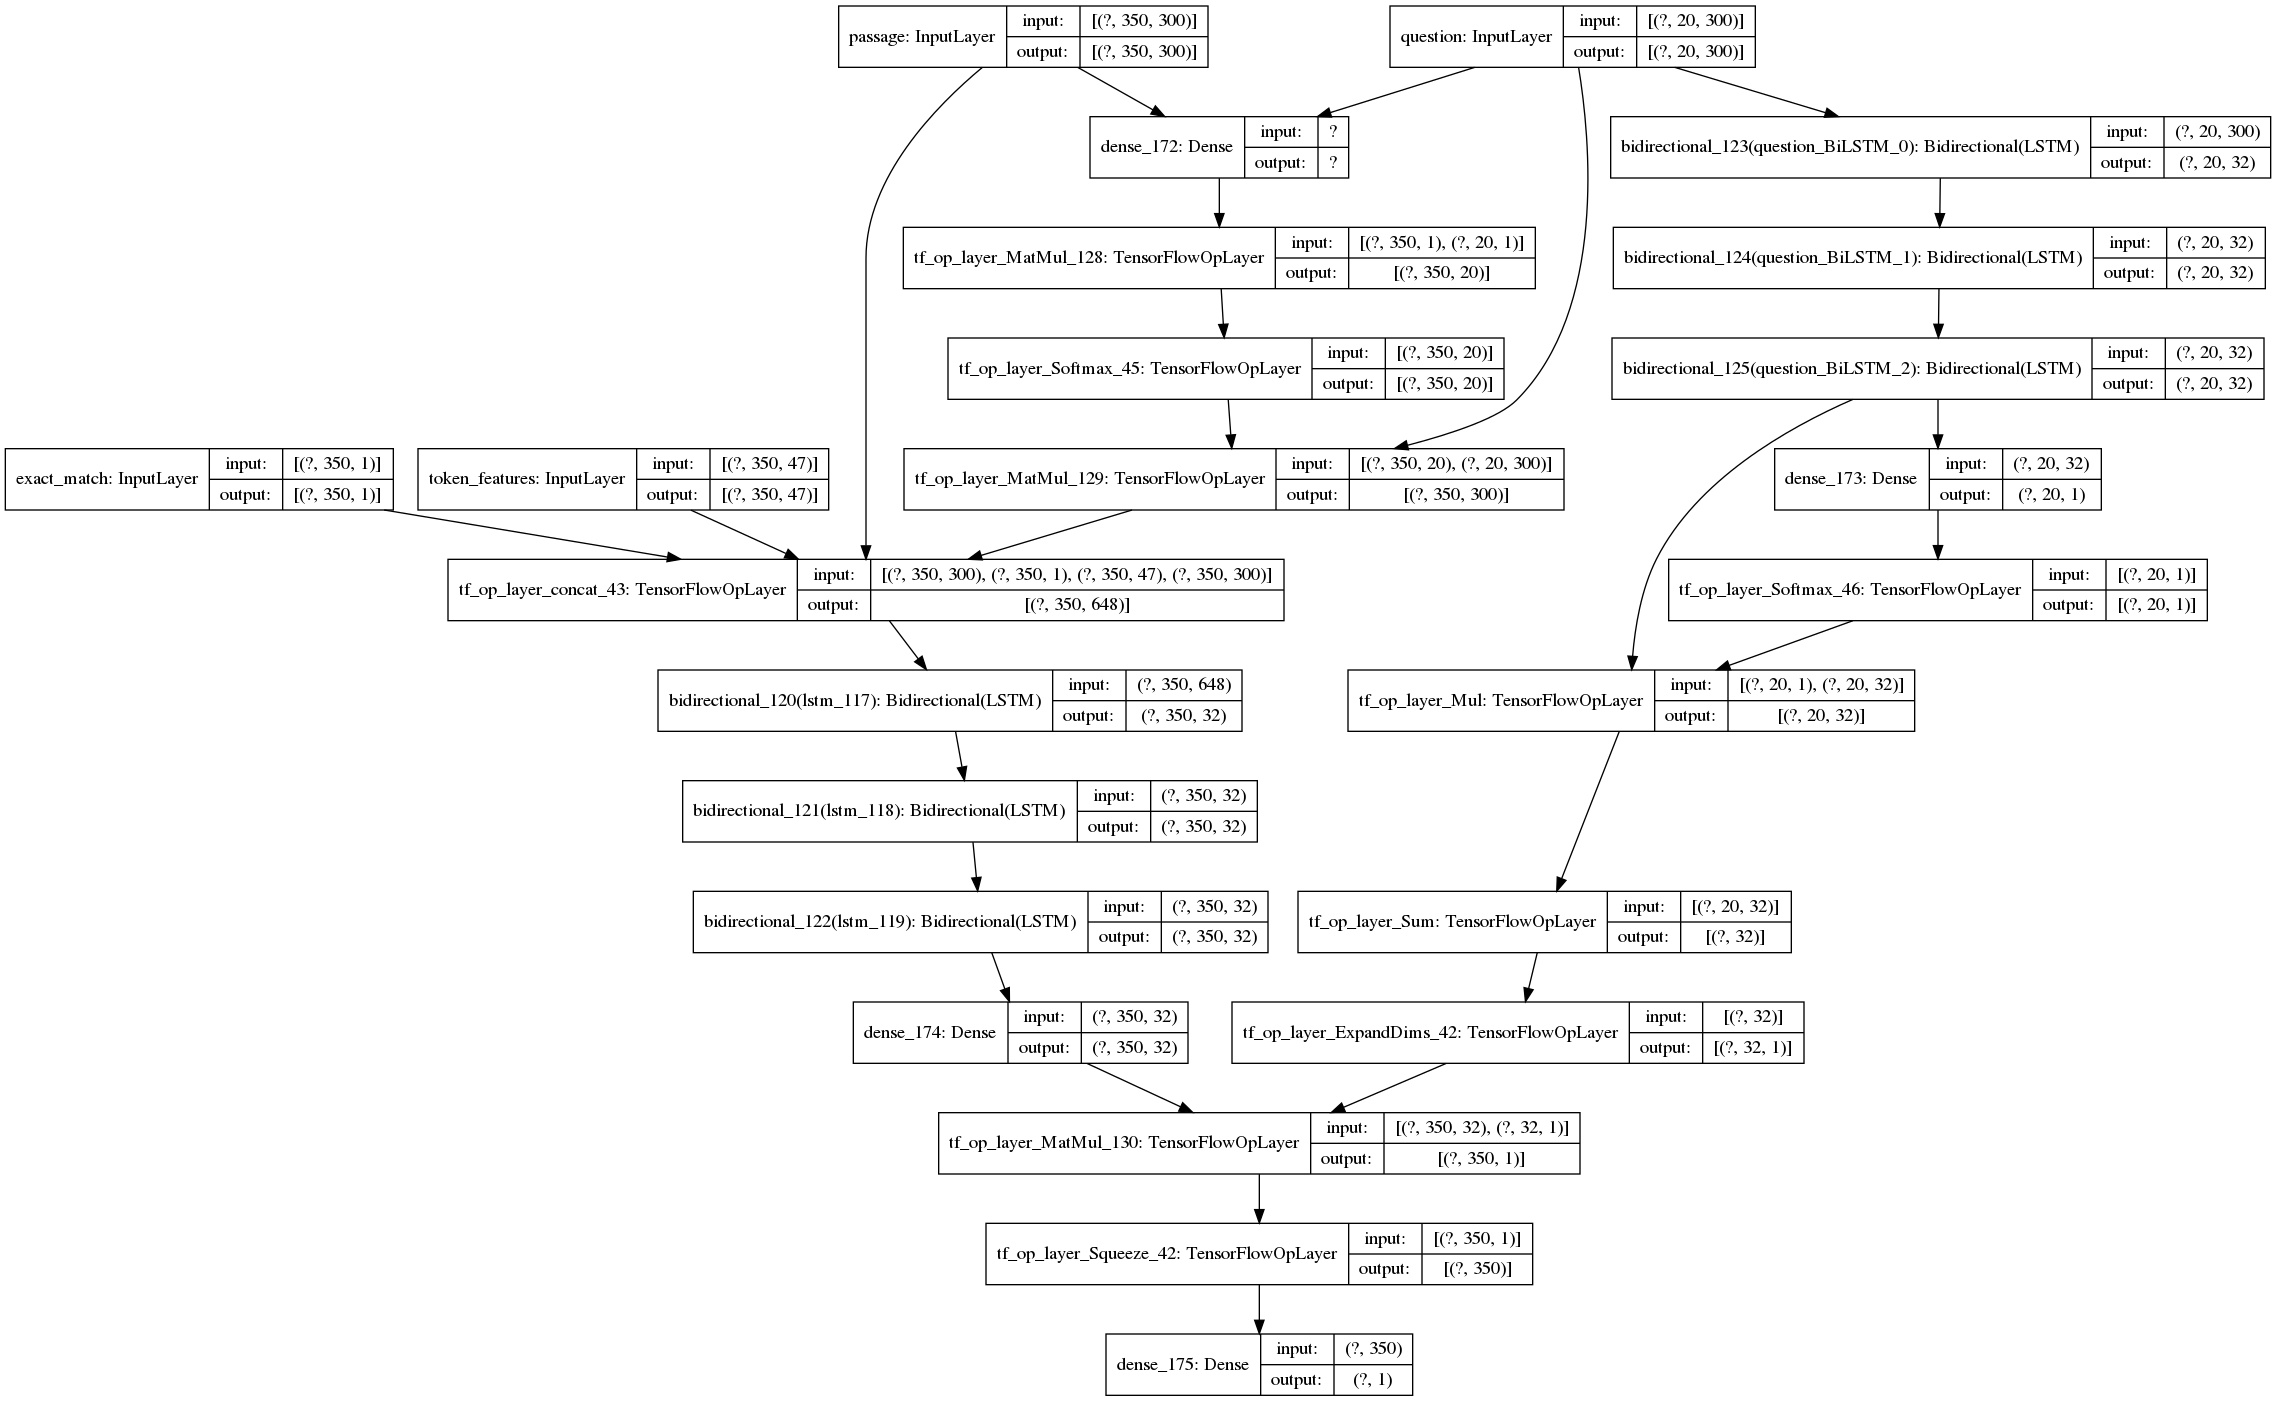

In [793]:
tf.keras.utils.plot_model(_model, 'drqa.png', show_shapes=True)

In [839]:
def train_model(model, embeds):
    passage_embeddings, question_embeddings, match_features, token_features = embeds
    print(f'passage_embeddings = {passage_embeddings.shape}')
    print(f'question_embeddings = {question_embeddings.shape}')
    print(f'match_features = {match_features.shape}')
    print(f'token_features = {token_features.shape}')
    

In [840]:
def plot_history(train, dev):
    epoch_count = range(1, len(train) + 1)

    plt.plot(epoch_count, train)
    plt.plot(epoch_count, dev)
    plt.legend(['train', 'dev'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

In [841]:
def X_to_inputs(X):
    passage_embeddings, question_embeddings, match_features, token_features = X
    return {
         'passage': passage_embeddings,
         'question': question_embeddings,
         'token_features': token_features,
         'exact_match': match_features,
    }

In [842]:
def evaluate_model(current_model, X_test, y_test, do_print=False):
    acc = current_model.evaluate(X_to_inputs(X_test), y_test)
    return acc

In [843]:
def train_model(
    current_model, model_name, X, y, X_dev, y_dev, compute_class_weight=False,
    batch_sizes=BATCH_SIZES, epochs=EPOCHS, verbose=1,
):
    
    if compute_class_weight:
        class_weight = compute_sample_weight('balanced', np.unique(y), y)
    else:
        class_weight = None
    
    checkpoint_path = f'models/{model_name}/chkpt/{model_name}.checkpoint'
    final_path = f'models/{model_name}/tf/{model_name}'

    save_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path, monitor='val_loss', verbose=verbose,
        save_best_only=True, save_weights_only=True,
        save_freq='epoch')
    
    train_acc = []
    dev_acc = []

    for batch_size in batch_sizes:
        if verbose:
            print(batch_size)
        history = current_model.fit(
            X_to_inputs(X),
            y,
            validation_data=(
                X_to_inputs(X_dev),
                y_dev),
            callbacks=[save_checkpoint],
            epochs=epochs,
            verbose=verbose,
            class_weight=class_weight,
            batch_size=batch_size)

        train_acc.extend(history.history['accuracy'])
        dev_acc.extend(history.history['val_accuracy'])
    current_model.save_weights(final_path)
    plot_history(train_acc, dev_acc)

## !!!!!!!!!!!!!!!!!!1

512
Train on 9427 samples, validate on 2190 samples
Epoch 1/10
9216/9427 [============================>.] - ETA: 2s - loss: 0.6806 - accuracy: 0.5971
Epoch 00001: val_loss improved from inf to 0.66721, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 101s 11ms/sample - loss: 0.6804 - accuracy: 0.5974 - val_loss: 0.6672 - val_accuracy: 0.6224
Epoch 2/10
9216/9427 [============================>.] - ETA: 1s - loss: 0.6659 - accuracy: 0.6217
Epoch 00002: val_loss improved from 0.66721 to 0.66050, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 72s 8ms/sample - loss: 0.6658 - accuracy: 0.6217 - val_loss: 0.6605 - val_accuracy: 0.6219
Epoch 3/10
9216/9427 [============================>.] - ETA: 1s - loss: 0.6587 - accuracy: 0.6247
Epoch 00003: val_loss improved from 0.66050 to 0.65794, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [===================

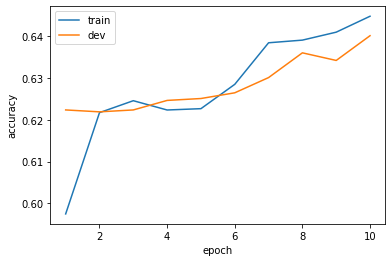

1080/1080 [==============================] - 8s 7ms/sample - loss: 0.6284 - accuracy: 0.6463


[0.6283612975367794, 0.6462963]

In [824]:
_model = drqa(
    passage_size=MAX_LEN_PASSAGE, 
    question_size=MAX_LEN_QUEST, 
    embeds_dim=FT_EMBEDS_DIM, 
    match_dim=1,
    token_features_dim=TOKEN_FEATURES_DIM,
    alpha_dim=ALPHA_DIM,
    passage_lstm=LSTM_PASSAGE_DIM,
    question_lstm=LSTM_QUESTION_DIM,
    paragraph_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    },
    question_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    }
)
_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_model(
    _model, 'test_model',
    X=train_embeds, y=y_train,
    X_dev=dev_embeds, y_dev=y_dev,
    epochs=EPOCHS,
)
evaluate_model(_model, test_embeds, y_test)

## !!!!!!!!!!!!!!!!!!1

512
Train on 9427 samples, validate on 2190 samples
Epoch 1/20
9216/9427 [============================>.] - ETA: 2s - loss: 0.6815 - accuracy: 0.5845
Epoch 00001: val_loss improved from inf to 0.66626, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 105s 11ms/sample - loss: 0.6813 - accuracy: 0.5850 - val_loss: 0.6663 - val_accuracy: 0.6215
Epoch 2/20
9216/9427 [============================>.] - ETA: 1s - loss: 0.6668 - accuracy: 0.6215
Epoch 00002: val_loss improved from 0.66626 to 0.66135, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 72s 8ms/sample - loss: 0.6666 - accuracy: 0.6215 - val_loss: 0.6614 - val_accuracy: 0.6219
Epoch 3/20
9216/9427 [============================>.] - ETA: 1s - loss: 0.6623 - accuracy: 0.6233
Epoch 00003: val_loss improved from 0.66135 to 0.66078, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [===================

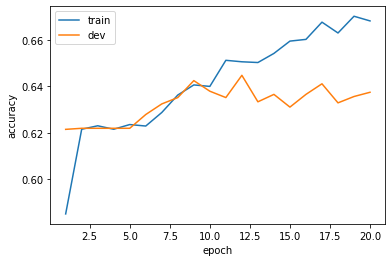

1080/1080 [==============================] - 8s 7ms/sample - loss: 0.6299 - accuracy: 0.6500


[0.6299417915167632, 0.65]

In [851]:
_model = drqa(
    passage_size=MAX_LEN_PASSAGE, 
    question_size=MAX_LEN_QUEST, 
    embeds_dim=FT_EMBEDS_DIM, 
    match_dim=1,
    token_features_dim=TOKEN_FEATURES_DIM,
    alpha_dim=ALPHA_DIM,
    passage_lstm=LSTM_PASSAGE_DIM,
    question_lstm=LSTM_QUESTION_DIM,
    paragraph_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    },
    question_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    }
)
_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_model(
    _model, 'test_model',
    X=train_embeds, y=y_train,
    X_dev=dev_embeds, y_dev=y_dev,
    epochs=20,
)
evaluate_model(_model, test_embeds, y_test)

512
Train on 9427 samples, validate on 2190 samples
Epoch 1/20
9216/9427 [============================>.] - ETA: 2s - loss: 0.6805 - accuracy: 0.5907
Epoch 00001: val_loss improved from inf to 0.66388, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 100s 11ms/sample - loss: 0.6803 - accuracy: 0.5911 - val_loss: 0.6639 - val_accuracy: 0.6219
Epoch 2/20
9216/9427 [============================>.] - ETA: 1s - loss: 0.6650 - accuracy: 0.6209
Epoch 00002: val_loss improved from 0.66388 to 0.66069, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 74s 8ms/sample - loss: 0.6649 - accuracy: 0.6206 - val_loss: 0.6607 - val_accuracy: 0.6219
Epoch 3/20
9216/9427 [============================>.] - ETA: 1s - loss: 0.6590 - accuracy: 0.6221
Epoch 00003: val_loss improved from 0.66069 to 0.65797, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [===================

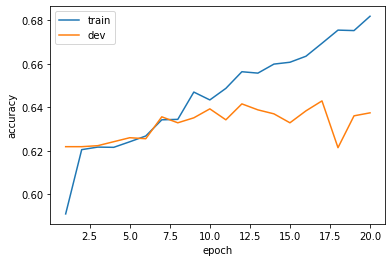

1080/1080 [==============================] - 8s 7ms/sample - loss: 0.6361 - accuracy: 0.6417


[0.6360792177694815, 0.64166665]

In [935]:
_model = drqa(
    passage_size=MAX_LEN_PASSAGE, 
    question_size=MAX_LEN_QUEST, 
    embeds_dim=FT_EMBEDS_DIM, 
    match_dim=1,
    token_features_dim=TOKEN_FEATURES_DIM,
    alpha_dim=1,
    passage_lstm=LSTM_PASSAGE_DIM,
    question_lstm=LSTM_QUESTION_DIM,
    paragraph_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    },
    question_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    }
)
_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_model(
    _model, 'test_model',
    X=train_embeds, y=y_train,
    X_dev=dev_embeds, y_dev=y_dev,
    epochs=20,
)
evaluate_model(_model, test_embeds, y_test)

512
Train on 9427 samples, validate on 2190 samples
Epoch 1/10
9216/9427 [============================>.] - ETA: 2s - loss: 0.6808 - accuracy: 0.5778
Epoch 00001: val_loss improved from inf to 0.66250, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 104s 11ms/sample - loss: 0.6806 - accuracy: 0.5787 - val_loss: 0.6625 - val_accuracy: 0.6219
Epoch 2/10
9216/9427 [============================>.] - ETA: 1s - loss: 0.6634 - accuracy: 0.6214
Epoch 00002: val_loss improved from 0.66250 to 0.65857, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 73s 8ms/sample - loss: 0.6633 - accuracy: 0.6213 - val_loss: 0.6586 - val_accuracy: 0.6219
Epoch 3/10
9216/9427 [============================>.] - ETA: 1s - loss: 0.6579 - accuracy: 0.6230
Epoch 00003: val_loss improved from 0.65857 to 0.65656, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [===================

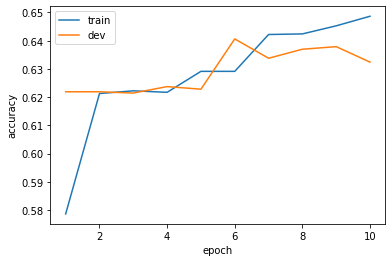

1080/1080 [==============================] - 8s 8ms/sample - loss: 0.6304 - accuracy: 0.6407


[0.630398362212711, 0.64074075]

In [803]:
_model = drqa(
    passage_size=MAX_LEN_PASSAGE, 
    question_size=MAX_LEN_QUEST, 
    embeds_dim=FT_EMBEDS_DIM, 
    match_dim=1,
    token_features_dim=TOKEN_FEATURES_DIM,
    alpha_dim=ALPHA_DIM,
    passage_lstm=LSTM_PASSAGE_DIM,
    question_lstm=LSTM_QUESTION_DIM,
    paragraph_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    },
    question_params = {
        'dropout': 0.3,
        'recurrent_dropout': 0.3,
    }
)
_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_model(
    _model, 'test_model',
    X=train_embeds, y=y_train,
    X_dev=dev_embeds, y_dev=y_dev,
    epochs=10,
)
evaluate_model(_model, test_embeds, y_test)

In [757]:
# question = np.random.random([3, 30, 256])
# passage = np.random.random([3, 350, 256])
# match_ft = np.random.random([3, 350, 3])
# token_ft = np.random.random([3, 350, 2])

_model = drqa(
    passage_size=MAX_LEN_PASSAGE, 
    question_size=MAX_LEN_QUEST, 
    embeds_dim=FT_EMBEDS_DIM, 
    match_dim=1,
    token_features_dim=TOKEN_FEATURES_DIM,
    alpha_dim=ALPHA_DIM,
    passage_lstm=LSTM_PASSAGE_DIM,
    question_lstm=LSTM_QUESTION_DIM)

_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

512
Train on 9427 samples, validate on 2190 samples
Epoch 1/10
9216/9427 [============================>.] - ETA: 1s - loss: 0.6717 - accuracy: 0.6146
Epoch 00001: val_loss improved from inf to 0.66167, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 59s 6ms/sample - loss: 0.6717 - accuracy: 0.6144 - val_loss: 0.6617 - val_accuracy: 0.6228
Epoch 2/10
9216/9427 [============================>.] - ETA: 0s - loss: 0.6587 - accuracy: 0.6227
Epoch 00002: val_loss improved from 0.66167 to 0.65739, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [==============================] - 43s 5ms/sample - loss: 0.6585 - accuracy: 0.6228 - val_loss: 0.6574 - val_accuracy: 0.6242
Epoch 3/10
9216/9427 [============================>.] - ETA: 0s - loss: 0.6470 - accuracy: 0.6308
Epoch 00003: val_loss improved from 0.65739 to 0.65243, saving model to models/test_model/chkpt/test_model.checkpoint
9427/9427 [=====================

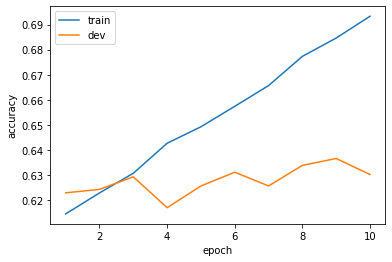

In [758]:
train_model(
    _model, 'test_model',
    X=train_embeds, y=y_train,
    X_dev=dev_embeds, y_dev=y_dev,
    epochs=EPOCHS
)

In [759]:
evaluate_model(_model, test_embeds, y_test)

1080/1080 [==============================] - 4s 3ms/sample - loss: 0.6444 - accuracy: 0.6519


[0.6444457122573146, 0.65185183]

In [528]:
evaluate_model(_model, test_embeds, y_test)

1080/1080 [==============================] - 3s 3ms/sample - loss: 0.6644 - accuracy: 0.6565


[0.6643944872750176, 0.6564815]

In [366]:
train_model(_model, train_embeds)

passage_embeddings = (9427, 350, 300)
question_embeddings = (9427, 20, 300)
match_features = (9427, 350, 1)
token_features = (9427, 350, 47)


In [265]:
passage.shape

(3, 94500)

In [266]:
question.shape

(3, 7680)

In [267]:
inputs.shape

(3, 102180)

In [268]:
inputs = np.concatenate([passage, question], axis=1)

In [275]:
def get_model(model_class=QuestionEncoding, sentence_size=10, embed_dim=256, quest_lstm=5,
             pos_dim=10, ner_dim=1, match_dim=3):
#     model = model_class(quest_lstm=quest_lstm)
    model = model_class()
#     model.build(input_shape=(None, sentence_size, embed_dim))
    model.build(input_shape=(None, sentence_size, 102180))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    return model

In [276]:
model = get_model(model_class=ParagraphEncoding)
# model = get_model()

lstm shape: (None, 350, 22)


In [277]:
# test_sent = test_sent.reshape(1, test_sent.shape[0], test_sent.shape[1])

In [278]:
question.shape

(3, 7680)

## Часть 4. [3 балла] BiDAF-подобная архитектура

Основана на статье: Bidirectional Attention Flow for Machine Comprehension

Minjoon Seo, Aniruddha Kembhavi, Ali Farhadi, Hannaneh Hajishirzi

https://arxiv.org/abs/1611.01603

Архитектура BiDAF предложена для задачи SQuAD, но легко может быть адаптирована к текущему заданию. Модель состоит из следующих блоков:
1. Кодировщик  получает на вход два представления слова: эмбеддинг слова и полученное из CNN посимвольное представление слова. Кодировщики для вопроса и для параграфа одинаковы. 
2. Слой внимания (детальное описание приведено в статье, см. пункт Attention Flow Layer)
3. Промежуточный слой, который получает на вход контекстуализированные эмбеддинги слов из параграфа, состоящие из трех частей (выход кодировщика параграфа,   Query2Context (один вектор) и Context2Query (матрица) выравнивания

4. Слой предсказания. 

Предложите, как можно было модифицировать последний слой предсказания в архитектуре BiDAF, с учетом того, что итоговое предсказание – это метка yes / no, предсказание которой проще, чем предсказание спана ответа для SQuAD.

Оцените качество этой модели для решения задачи. 

[bonus] Замените входные эмбеддинги и все дополнительные признаки, используемые кодировщиками, на BERT эмбеддинги. Улучшит ли это качество результатов?

Сравнение DrQA и BiDAF:
    
![](https://www.researchgate.net/profile/Felix_Wu6/publication/321069852/figure/fig1/AS:560800147881984@1510716582560/Schematic-layouts-of-the-BiDAF-left-and-DrQA-right-architectures-We-propose-to.png)

In [1098]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Embedding, Activation, Flatten, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [1221]:
# alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789,;.!?:\'"/\\|_@#$%^&*~`+-=<>()[]{}'
# ALPHABET_SIZE = len(alphabet)


# def tokenize_and_encode_sentences(sentence: Iterable[str], max_sentence_len):
#     tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
#     word_index = {}
#     for i, char in enumerate(alphabet):
#         word_index[char] = i + 1

#     tk.word_index = word_index.copy()
#     tk.word_index[tk.oov_token] = max(word_index.values()) + 1

#     char_encoding = tk.texts_to_sequences(sentence)
#     char_encoding = pad_sequences(char_encoding, maxlen=max_sentence_len, padding='post')

#     return np.array(char_encoding)

In [1103]:
# def tokenize_and_encode_sentences(texts: List[List[str]], max_word_len):
#     encoded_sentences = []
    
#     # assert padding
#     assert len(set([len(s) for s in texts])) == 1
    
#     for sentence in tqdm(texts):
#         encoded_sentence = tokenize_and_encode_sentence(sentence, max_word_len=max_word_len)
#         encoded_sentences.append(encoded_sentence)

#     return np.array(encoded_sentences)

In [1306]:
def tokenize_and_encode_sentence(sentence: Iterable[str], max_word_len):
    tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
    alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789,;.!?:\'"/\\|_@#$%^&*~`+-=<>()[]{}'
    word_index = {}
    for i, char in enumerate(alphabet):
        word_index[char] = i + 1

    tk.word_index = word_index.copy()
    tk.word_index[tk.oov_token] = max(word_index.values()) + 1

    char_encoding = tk.texts_to_sequences(sentence)
    char_encoding = pad_sequences(char_encoding, maxlen=max_word_len, padding='post')

    return np.array(char_encoding)

In [1307]:
def tokenize_and_encode_sentences(texts: List[List[str]], max_word_len):
    encoded_sentences = []
    
    # assert padding
    assert len(set([len(s) for s in texts])) == 1
    
    for sentence in tqdm(texts):
        encoded_sentence = tokenize_and_encode_sentence(sentence, max_word_len=max_word_len)
        encoded_sentences.append(encoded_sentence)

    return np.array(encoded_sentences)

In [1310]:
def tokenize_and_encode_inputs(
    questions_padded: List[List[str]],
    passages_padded: List[List[str]]
) -> Tuple[np.array, np.array]:
    questions = tokenize_and_encode_sentences(questions_padded, max_word_len=MAX_WORD_LEN_SYM)
    passages = tokenize_and_encode_sentences(passages_padded, max_word_len=MAX_WORD_LEN_SYM)
    
    return questions, passages

In [1311]:
%%time
train_char_embeds = tokenize_and_encode_inputs(train_questions, train_passages)
dev_char_embeds = tokenize_and_encode_inputs(dev_questions, dev_passages)
test_char_embeds = tokenize_and_encode_inputs(test_questions, test_passages)


CPU times: user 8.38 s, sys: 0 ns, total: 8.38 s
Wall time: 8.3 s


In [1312]:
print(train_char_embeds[0].shape, train_char_embeds[1].shape)
print(dev_char_embeds[0].shape, dev_char_embeds[1].shape)
print(test_char_embeds[0].shape, test_char_embeds[1].shape)

(9427, 20, 15) (9427, 350, 15)
(2190, 20, 15) (2190, 350, 15)
(1080, 20, 15) (1080, 350, 15)


In [1451]:
class CharacterTokensLayer(Layer):
    def __init__(self, *, word_len, embedding_size, sentence_size, pooling_sizes, filters, kernels):
        super(CharacterTokensLayer, self).__init__()
        self.word_len = word_len
        self.embedding_size = embedding_size
        self.sentence_size = sentence_size

        self.embedding_layer = Embedding(ALPHABET_SIZE + 1, embedding_size, input_length=sentence_size)
        self.convs = [Conv1D(filters=filtr,
                             kernel_size=kernel_size,
                             activation='tanh',
                             name=f'{self.name}_Conv1D_{filtr}_{kernel_size}')
                      for filtr, kernel_size in zip(filters, kernels)]
        self.pool = GlobalMaxPooling1D(name=f'{self.name}_MaxPoolingOverTime')
    
#         self.pools = [
#             MaxPooling1D(name=f'MaxPooling1D_{pool_size}', pool_size=pool_size)
#             for pool_size in pooling_sizes
#         ]
    
    def __call__(self, inputs):
        
        print(f'inputs.shape={inputs.shape}')
        
        embedding = self.embedding_layer(inputs)
        # batch, sentence_size, word_len, embedding_size
        print(f'embedding.shape={embedding.shape}')
        
        
        embedding = tf.reshape(embedding, [-1, self.word_len, self.embedding_size]) 
        # batch * sentence_size, word_len, embedding_size
        
#         print(f'embedding.shape={embedding.shape}')
        
        outputs = []
        for conv in self.convs:
            conved = conv(embedding)
#             print(f'conved={conved.shape}')
            pooled = self.pool(conved)
#             print(f'pooled={pooled.shape}')
            outputs.append(pooled)
#             print(f'outputs[i]={outputs[-1].shape}')

        concated = tf.concat(outputs, axis=-1)
#         print(f'concated.shape={concated.shape}')        
        
        final_embed_shape = concated.shape[-1]

        
        expanded = tf.reshape(concated, [-1, self.sentence_size, final_embed_shape])
        print(f'expanded.shape={expanded.shape}')
        
        return expanded

In [1463]:
class HighWayLayer(tf.keras.layers.Layer):
#     _name_dict = defaultdict(int)
    
    def __init__(self, linear_dense_activation, transform_bias=-3, **kwargs):
        super(HighWayLayer, self).__init__(**kwargs)
        
        self.linear_dense_activation = linear_dense_activation
        self.transform_bias = transform_bias
        
        
    def build(self, input_shape):
    
        # From Paper:
        #    We optimized the initial learning rate, momentum,
        #    learning rate decay rate, activation function for H (either
        #    ReLU or tanh) and, for highway networks, the value for
        #    the transform gate bias (between -1 and -10)
        
        dim = input_shape[-1]
        
        transorm_bias_initializer = tf.keras.initializers.Constant(self.transform_bias)
        
        # H
        self.linear_transform = Dense(
            dim, 
            activation=self.linear_dense_activation,
            name=f'HighWay_H_{self.name}')

        # T
        self.non_linear_transofm = Dense(
            dim, 
            activation='sigmoid',
            bias_initializer=transorm_bias_initializer,
            name=f'HighWay_T_{self.name}')
        super(HighWayLayer, self).build(input_shape)
        
        
    def call(self, x):
        print(f'{self.name} x.shape={x.shape}')
        
        # y = H(x,WH)· T(x,WT) + x · C(x,WC). 
        # C = 1 - T

        H = self.linear_transform(x)
        T = self.non_linear_transofm(x)

        C = tf.keras.layers.Lambda(
            lambda x: 1.0 - x,
            name=f'HighWay_C'
        )(T)

        output1 = tf.multiply(H, T, name=f'HightWay_output1_{self.name}')
        output2 = tf.multiply(x, C, name=f'HightWay_output2_{self.name}')
        res = tf.keras.layers.add([output1, output2], name=f'HighWay_add_{self.name}')
        return res
    

In [1464]:
class HighWayLayers(Layer):
    def __init__(self, num_layers, linear_dense_activation, transform_bias=-3):
        super(HighWayLayers).__init__()
        
        self.layers = [
            HighWayLayer(linear_dense_activation=linear_dense_activation, transform_bias=transform_bias)
            for _ in range(num_layers)
        ]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [1540]:
class ContextualEmbeddingLayer(Layer):
    def __init__(self, highway_params, lstm_params):
        super(ContextualEmbeddingLayer).__init__()
        self.highway = HighWayLayers(**highway_params)
        self.BiLSTM = tf.keras.layers.Bidirectional(
           tf.keras.layers.LSTM(
               **lstm_params, 
               return_sequences=True,
               name=f'question_BiLSTM_{i}'))
        
        
    def __call__(self, word_embeddings, character_embeddings):
        print(f'word_embeddings: {word_embeddings.shape}')
        print(f'character_embeddings: {character_embeddings.shape}')
        embeddings = tf.concat([word_embeddings, character_embeddings], axis=-1)
        
        embeddings = self.highway(embeddings)
        
        res = self.BiLSTM(embeddings)
        
        return res        

In [1611]:
class C2QAttention(Layer):

    def __init__(self, **kwargs):
        super(C2QAttention, self).__init__(**kwargs)


    def __call__(self, similarity_matrix, encoded_question):
        context_to_query_attention = tf.nn.softmax(similarity_matrix, axis=-1, name=f'{self.name}_softmax')
        encoded_question = tf.expand_dims(encoded_question, axis=1)
        return tf.keras.backend.sum(tf.expand_dims(context_to_query_attention, axis=-1) * encoded_question, -2)

In [1612]:
class Q2CAttention(Layer):
    def __init__(self, **kwargs):
        super(Q2CAttention, self).__init__(**kwargs)
        self.softmax = tf.keras.layers.Softmax(axis=-1, name=f'{self.name}_softmax')

    def __call__(self, similarity_matrix, encoded_context):
        max_similarity = tf.keras.backend.max(similarity_matrix, axis=-1)
        context_to_query_attention = self.softmax(max_similarity)
        
        weighted_sum = tf.keras.backend.sum(tf.expand_dims(context_to_query_attention, axis=-1) * encoded_context, -2)
        
        expanded_weighted_sum = tf.expand_dims(weighted_sum, 1)
        num_of_repeatations = tf.shape(encoded_context)[1]
        
        return tf.tile(expanded_weighted_sum, [1, num_of_repeatations, 1])

In [1613]:
class Similarity(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(Similarity, self).__init__(**kwargs)


    def build(self, input_shape):
        context_vectors_shape, query_vectors_shape = input_shape
        self.T = context_vectors_shape[1]
        self.J = query_vectors_shape[1]
        self.d = context_vectors_shape[2] // 2
        self.w = tf.keras.layers.Dense(units=1, activation=None, use_bias=False)
        super(Similarity, self).build(input_shape)


    def call(self, inputs):
        context_vectors, query_vectors = inputs
        # (?, T, 2d), (?, J, 2d)
        
        print(f'context_vectors.shape={context_vectors.shape}')
        print(f'query_vectors.shape={query_vectors.shape}')

        shape = (-1, self.T, self.J, 2 * self.d)  # (N, T, J, 2d)
        expanded_context_vectors = tf.expand_dims(context_vectors, 2)               # (N, T, 1, 2d)
        expanded_context_vectors = tf.broadcast_to(expanded_context_vectors, shape) # (N, T, J, 2d)
        expanded_query_vectors = tf.expand_dims(query_vectors, 1)                   # (N, 1, J, 2d)
        expanded_query_vectors = tf.broadcast_to(expanded_query_vectors, shape)     # (N, T, J, 2d)
        
        # element-wise
        m = tf.math.multiply(expanded_context_vectors, expanded_query_vectors)      # (N, T, J, 2d)
        
        # [h; u; h◦u]
        concated = tf.concat([expanded_context_vectors, expanded_query_vectors, m], axis=-1) # (N, T, J, 6d)
        
        similarity = self.w(concated)
        similarity = tf.reshape(similarity, [-1, self.T, self.J])
        return similarity


    def compute_output_shape(self, input_shape):
        context_vectors_shape, query_vectors_shape = input_shape
        batch_size = context_vectors_shape[0]
        num_context_words = context_vectors_shape[1]
        num_query_words = query_vectors_shape[1]
        return (batch_size, num_context_words, num_query_words)

    def get_config(self):
        config = super().get_config()
        return config

In [1625]:
class MergedContext(Layer):
    def __init__(self, **kwargs):
        super(MergedContext, self).__init__(**kwargs)

    def __call__(self, encoded_context, context_to_query_attention, query_to_context_attention):
        element_wise_multiply1 = tf.math.multiply(encoded_context, context_to_query_attention)
        element_wise_multiply2 = tf.math.multiply(encoded_context, query_to_context_attention)
        concatenated_tensor = tf.concat(
            [encoded_context, context_to_query_attention, element_wise_multiply1, element_wise_multiply2],
            axis=-1,
            name=f'{self.name}_contcat'
        )
        return concatenated_tensor

In [1639]:
class ModelingLayer(Layer):
    def __init__(self, num_decoders, d, recurrent_dropout, **kwargs):
        super(ModelingLayer, self).__init__(**kwargs)
        self.BiLSTMS = [
            tf.keras.layers.Bidirectional(
                tf.keras.layers.LSTM(
                    units=d,
                    recurrent_dropout=recurrent_dropout,
                    return_sequences=True,
                    name=f'M_BiLSTM_No{i}'))
            for i in range(num_decoders)
        ]
        
    def __call__(self, G):
        res = G
        for BiLSTM in self.BiLSTMS:
            res = BiLSTM(res)
        return res
    
    

In [1659]:
class BiDAFPredictionLayer(Layer):
    def __init__(self, d, **kwargs):
        super(BiDAFPredictionLayer, self).__init__(**kwargs)
        self.predictor = tf.keras.layers.Dense(1)
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')
        
        
    def __call__(self, G, M):
        # G: (N, T, 8d)
        # M: (N, T, 2d)
        GM = tf.concat([G, M], axis=-1)
        
        p = self.predictor(GM)  # (N, T, 1)
        p = tf.squeeze(p, 2) # (N, T)
        print(f'predictor p.shape={p.shape}')
        p = self.dense(p)
        print(f'dense p.shape={p.shape}')
        
        return p

In [1660]:
def build_bidaf(*, question_size, passage_size,
#                 question_size_sym, passage_size_sym,
                word_len,
                word_embedding_dim,
                question_character_tokens_params, passage_character_tokens_params,
                contextual_embedding_params,
                modeling_layer_params, 
                prediction_layer_params,
               ):
    question_embeddings = tf.keras.Input(shape=(question_size, word_embedding_dim),
                                    name='question_embeddings')
    passage_embeddings = tf.keras.Input(shape=(passage_size, word_embedding_dim),
                                   name='passage_embeddings')
    question_characters = tf.keras.Input(shape=(question_size, word_len),
                                    name='question_characters')
    passage_characters = tf.keras.Input(shape=(passage_size, word_len),
                                   name='passage_characters')
    
    question_character_tokens_layer = CharacterTokensLayer(**question_character_tokens_params)
    question_character_tokens = question_character_tokens_layer(question_characters)
    
    passage_character_tokens_layer = CharacterTokensLayer(**passage_character_tokens_params)
    passage_character_tokens = passage_character_tokens_layer(passage_characters)
    
    
    question_contextual_embedding = ContextualEmbeddingLayer(**contextual_embedding_params['question'])
    passage_contextual_embedding = ContextualEmbeddingLayer(**contextual_embedding_params['passage'])
    
    question_context_embeds = question_contextual_embedding(question_embeddings, question_character_tokens)
    passage_context_embeds = passage_contextual_embedding(passage_embeddings, passage_character_tokens)
    
    print(f'question_context_embeds: {question_context_embeds.shape}')
    print(f'passage_context_embeds: {passage_context_embeds.shape}')
    
    similarity_matrix = Similarity(name='similarity_layer')([passage_context_embeds, question_context_embeds])
    
    c2q_attention = C2QAttention(name='ContextToQueryAttention')
    q2c_attention = Q2CAttention(name='QueryToContextAttention')
    context_to_query_attention = c2q_attention(similarity_matrix, question_context_embeds)
    query_to_context_attention = q2c_attention(similarity_matrix, passage_context_embeds)
    
    G = MergedContext(name='MergedContext')(
        encoded_context=passage_context_embeds,
        context_to_query_attention=context_to_query_attention,
        query_to_context_attention=query_to_context_attention
    )
    
    modeling_layer = ModelingLayer(**modeling_layer_params)
    M = modeling_layer(G)
    # M: (N, T, 2d)
    
    predictor = BiDAFPredictionLayer(**prediction_layer_params)
    p = predictor(G, M)

    # Instantiate an end-to-end model predicting both priority and department
    model = tf.keras.Model(
        inputs=[
            question_embeddings, question_characters,
            passage_embeddings, passage_characters,
        ],
        outputs=[p]
    )
    return model

inputs.shape=(None, 20, 15)
embedding.shape=(None, 20, 15, 1014)
expanded.shape=(None, 20, 12)
inputs.shape=(None, 350, 15)
embedding.shape=(None, 350, 15, 1014)
expanded.shape=(None, 350, 12)
word_embeddings: (None, 20, 300)
character_embeddings: (None, 20, 12)
high_way_layer_235 x.shape=(None, 20, 312)
high_way_layer_236 x.shape=(None, 20, 312)
word_embeddings: (None, 350, 300)
character_embeddings: (None, 350, 12)
high_way_layer_237 x.shape=(None, 350, 312)
high_way_layer_238 x.shape=(None, 350, 312)
question_context_embeds: (None, 20, 200)
passage_context_embeds: (None, 350, 200)
context_vectors.shape=(None, 350, 200)
query_vectors.shape=(None, 20, 200)
predictor p.shape=(None, 350)
dense p.shape=(None, 1)


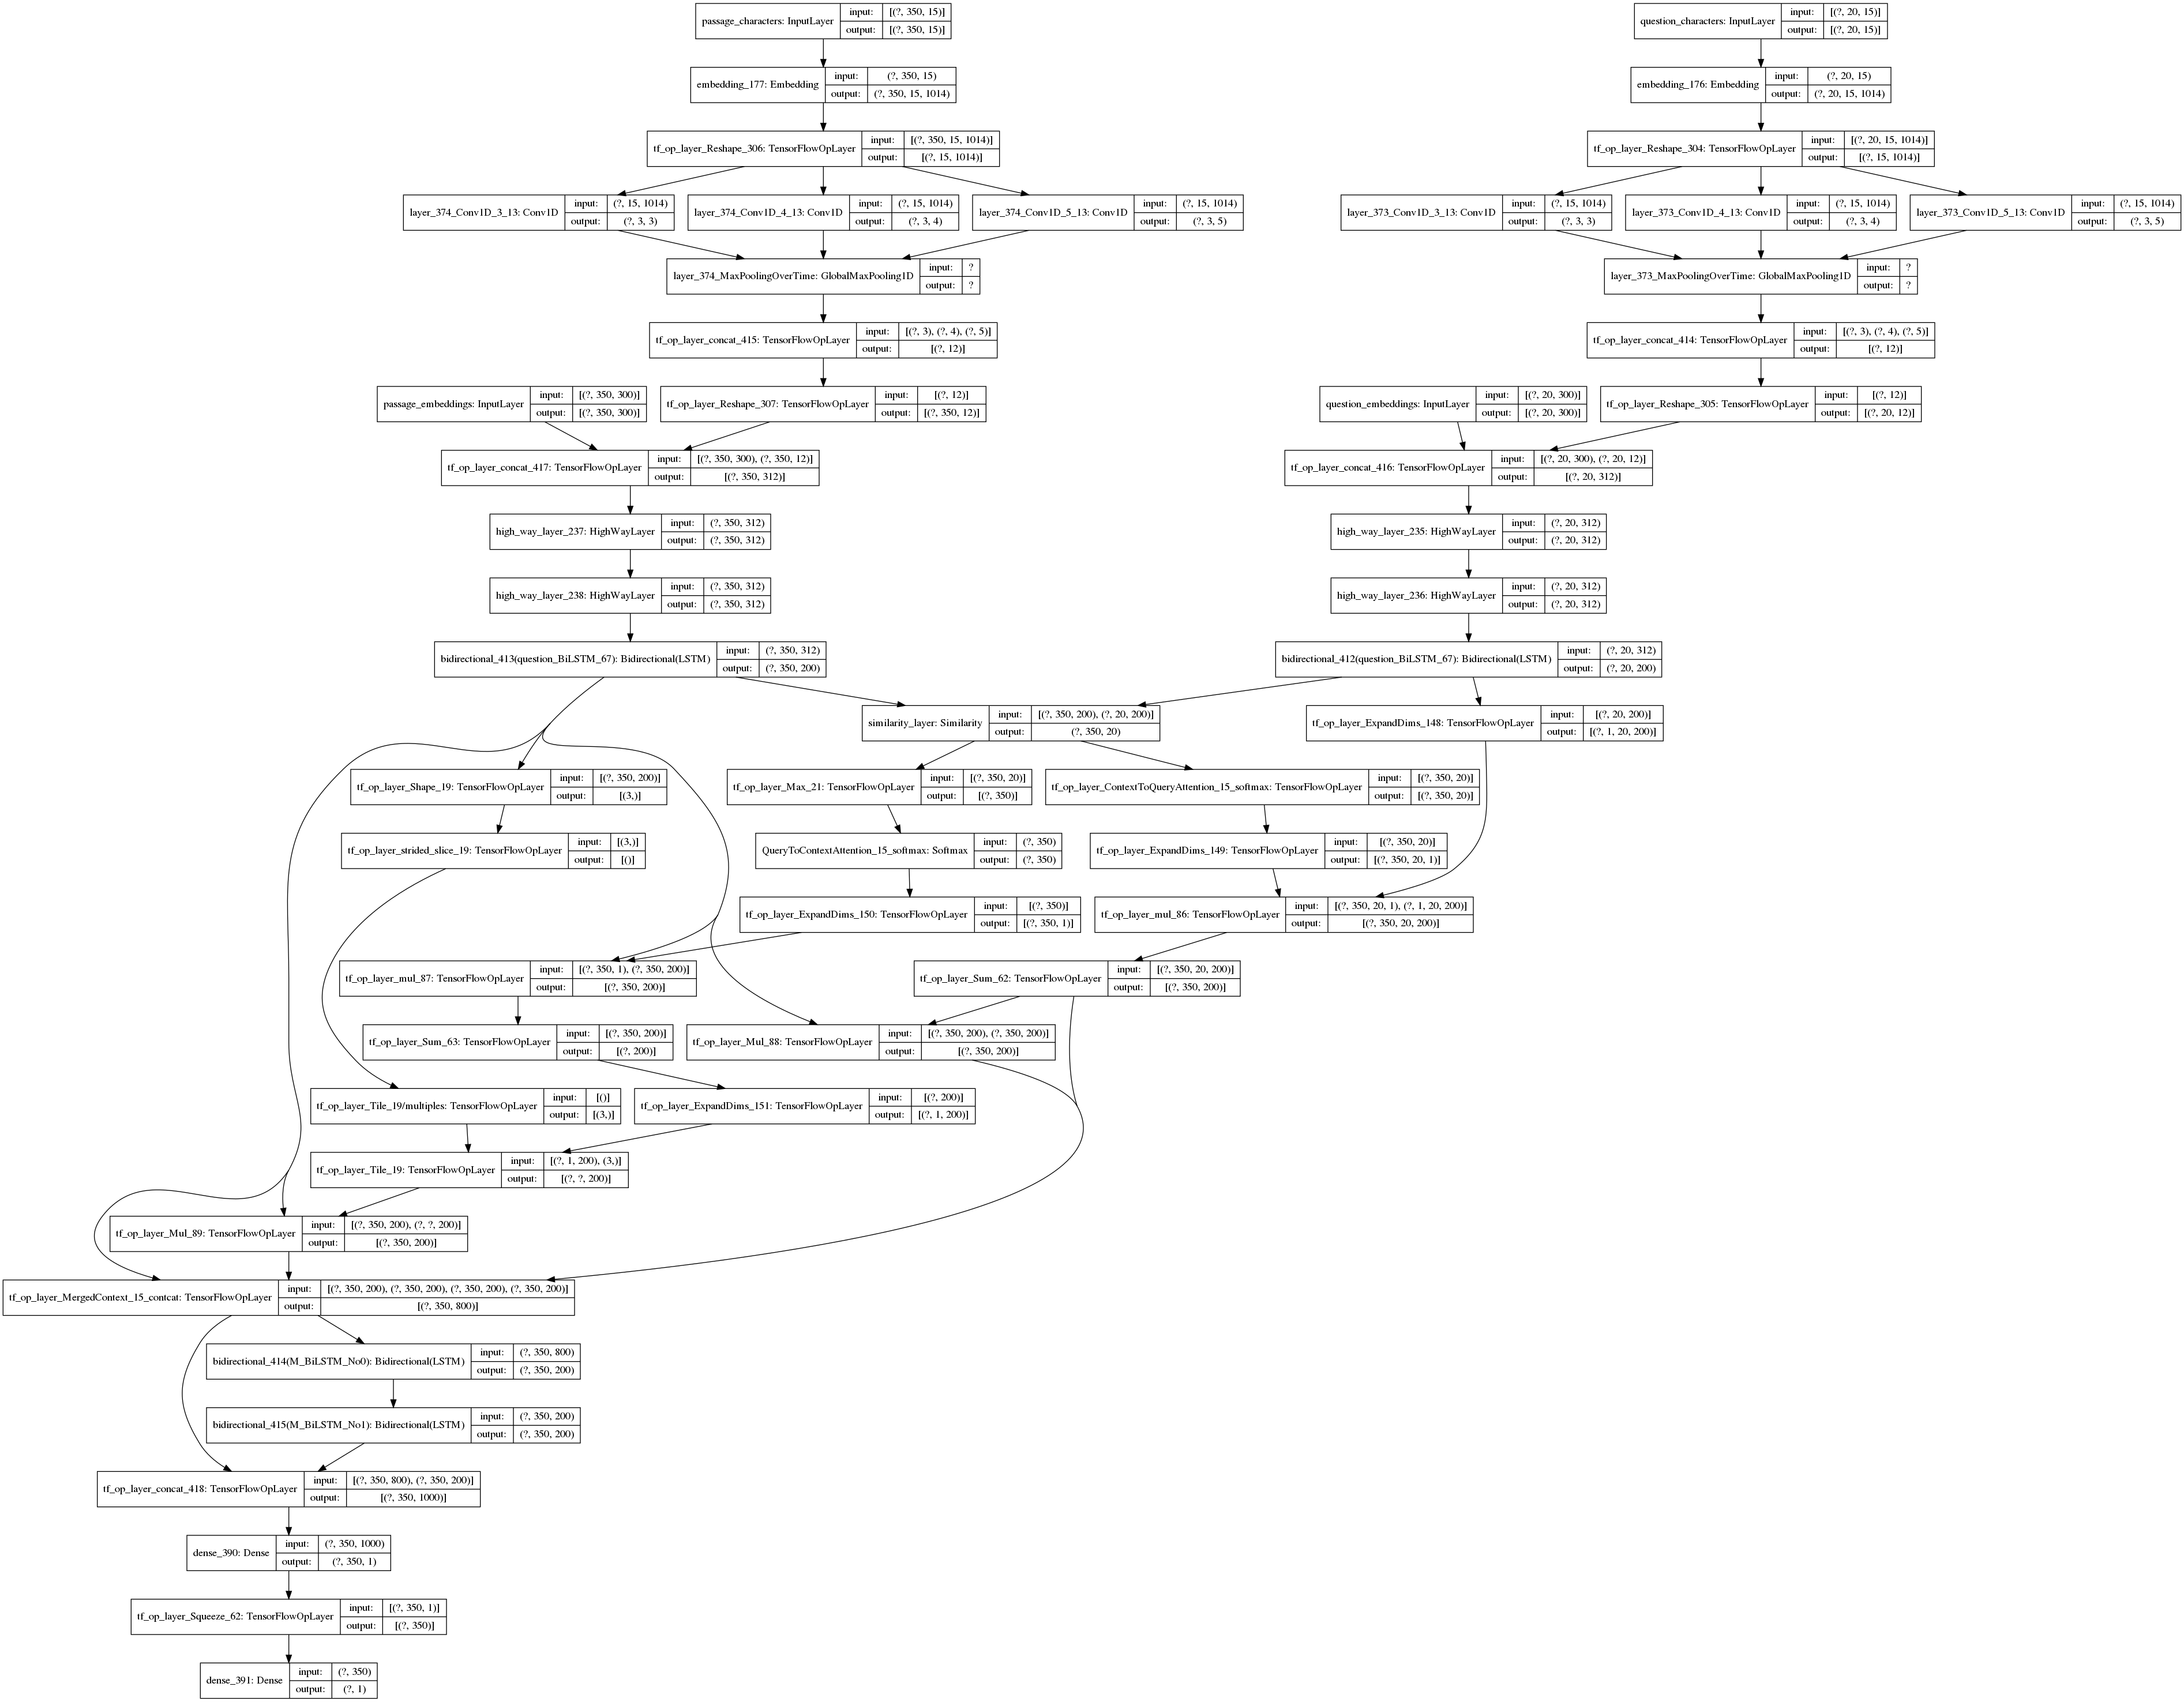

In [1661]:
lstm_dim=100

bidaf_model = build_bidaf(
    question_size=MAX_LEN_QUEST,
    passage_size=MAX_LEN_PASSAGE,
    word_len=MAX_WORD_LEN_SYM,
    word_embedding_dim=FT_EMBEDS_DIM,
    contextual_embedding_params={
        'question': {
            'highway_params': {
                'num_layers': 2,
                'linear_dense_activation': 'relu',
            },
            'lstm_params': {
                'units': lstm_dim,
                'dropout': 0.3,
                'recurrent_dropout': 0.3,
            },
        },
        'passage': {
            'highway_params': {
                'num_layers': 2,
                'linear_dense_activation': 'relu',
            },
            'lstm_params': {
                'units': lstm_dim,
                'dropout': 0.3,
                'recurrent_dropout': 0.3,
            },
        }
    },
    question_character_tokens_params={
        'word_len': MAX_WORD_LEN_SYM,
        'sentence_size': MAX_LEN_QUEST,
        'embedding_size': 1014,
        'filters': [3, 4, 5],
        'pooling_sizes': [3, 3, 3],
        'kernels': [13, 13, 13],
    },
    passage_character_tokens_params={
        'word_len': MAX_WORD_LEN_SYM,
        'sentence_size': MAX_LEN_PASSAGE,
        'embedding_size': 1014,
        'filters': [3, 4, 5],
        'pooling_sizes': [3, 3, 3],
        'kernels': [13, 13, 13],
    },
    modeling_layer_params={
        'num_decoders': 2,
        'd': lstm_dim,
        'recurrent_dropout': 0.3,
    },
    prediction_layer_params={
        'd': lstm_dim,
    },
)
bidaf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(bidaf_model, 'bidaf.png', show_shapes=True)

In [ ]:
# bidaf_model.summary()